# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Vyankat B Hambarde (Individual)

# **Project Summary -**

The aim of this project was to use machine learning methods to forecast the risk of coronary heart disease (CHD) in patients over the next 10 years. The researchers used data from an ongoing cardiovascular study conducted on residents of Framingham, Massachusetts. The dataset contained details of more than 4,000 patients and had 15 different attributes, each representing a possible factor contributing to the risk of CHD. These attributes covered information about the patients' demographics, behaviors, and medical conditions that could affect the likelihood of developing coronary heart disease.

Before analyzing the data, data preprocessing has been done. It involved cleaning and changing the data to make it easier to work with. One important step was dealing with missing values, where some information was not available for some patients. Different techniques were used to estimate these missing values, such as using the middle value (median) of similar data, the most common value (mode), or a method called KNN imputation. Outliers, which are unusual or extreme values that could affect the analysis, were also identified and removed from the data. This was done using a method called Interquartile Range (IQR). To improve the accuracy of the analysis, certain continuous variables that were unevenly distributed were transformed. For example, they were changed using mathematical functions like logarithms or square roots to make the data more balanced and easier to work with.

To ensure that the chosen features are not highly related to each other (reducing redundancy), a method called variance inflation factor was used to detect and remove multicollinearity. Multicollinearity occurs when some features are highly correlated, making it challenging for the model to distinguish their individual effects.

Additionally, a new feature named "pulse pressure" was created to capture the relationship between systolic and diastolic blood pressure. This newly derived feature can be valuable in understanding the impact of blood pressure on CHD risk. After the feature selection process, some columns that were found to be redundant were removed to simplify the dataset and avoid unnecessary complexity.
The most important features, based on their impact on predicting CHD risk, were identified as 'age', 'sex', 'education', 'cigs_per_day', 'bp_meds' (blood pressure medications usage), 'prevalent_stroke', 'prevalent_hyp' (prevalent hypertension), 'diabetes', 'total_cholesterol', 'bmi' (body mass index), 'heart_rate', 'glucose', and 'pulse_pressure'. These selected features can be used to build a more effective model to predict the risk of coronary heart disease in patients based on the dataset.

In this project, the dataset was imbalanced, meaning there were more examples of one class (patients without CHD risk) than the other class (patients with CHD risk). To address this issue, a combination of two techniques, SMOTE (Synthetic Minority Over-sampling Technique) and Tomek links undersampling, was used. This balanced the class distribution and improved the model's performance.

To ensure that all features had the same scale and to avoid any bias towards specific features, the data was scaled using the standard scalar method. Several machine learning models were tested to see how well they performed in predicting CHD risk. The main evaluation metric used was "recall," which measures the ability of the model to correctly identify patients with CHD risk. After thorough analysis, the Neural Network model, which was fine-tuned for better performance, was selected as the final prediction model. It had the highest recall score among all the evaluated models. By prioritizing a high recall score, the aim was to correctly identify as many patients at risk of CHD as possible, even if it meant having some false positives. Overall, the project demonstrated the potential of machine learning to accurately predict CHD risk in patients based on data from a cardiovascular study. Through careful data preprocessing, feature selection, and model evaluation, it was possible to achieve positive results by effectively predicting CHD risk in patients.

# **GitHub Link -**

https://github.com/vyankath/Capstone_CL_CRP

# **Problem Statement**


The dataset used in this study is from an ongoing cardiovascular study conducted on residents of Framingham, Massachusetts. The main objective is to predict whether a patient has a 10-year risk of developing coronary heart disease (CHD). The dataset contains information on more than 4,000 patients and includes 15 attributes, each representing a potential risk factor for CHD. These attributes cover various aspects, including demographic information, behaviors, and medical factors that could influence the risk of developing coronary heart disease.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [179]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt # For Manupulation of data



import seaborn as sns
import matplotlib.pyplot as plt  # For Visualization of data
%matplotlib inline

from sklearn.impute import KNNImputer     # For imputation of missing values
from sklearn.feature_selection import chi2 # Feature selection

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, classification_report, plot_confusion_matrix # evaluation metric for classofication algo
from sklearn import metrics

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold # above all For meachine learning work

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [180]:
CRP_df = pd.read_csv('data_cardiovascular_risk.csv')# importing and reading dataset

### Dataset First View

In [181]:
# Dataset First Look
df = CRP_df.copy()
df.head() # Having look at first five rows

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [182]:
# Dataset Rows & Columns count
df.shape[1],df.shape[0] # cheking the sahpe of data set i.e. No of rows and columns

         # There are 17 columns and 3390 rows in the dataset.

(17, 3390)

### Dataset Information

In [183]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

* df.info() Function gives the overall info of dataset which contains columns name, no of columns, datatype of columns and non null counts of entry in the form of dataframe.
* This data set has float64-9, int64-6-, object-2 i.e 17 columns with 3390 rows.

#### Duplicate Values

In [184]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [185]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<AxesSubplot:>

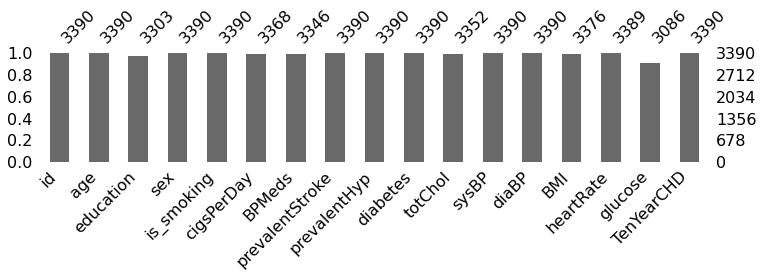

In [186]:
import missingno as msno    # Visualizing the missing valuesimport missingno as msno  this library can be used to check missing values in df
msno.bar(df,figsize=(12,2)) # By using bar graph we cna visuvalize the missing values in dataset and in this dataset no null values are there

In [187]:
nan_cols = [i for i in df.columns if df[i].isnull().sum() > 0]
nan_cols

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

<AxesSubplot:>

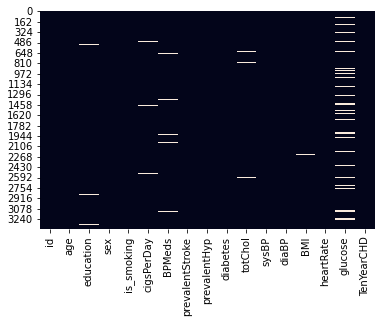

In [188]:
sns.heatmap(df.isnull(), cbar=False) # Visualizing the missing values

### What did you know about your dataset?

After performing various opearation on the dattset, till now follwing are the some observation can be made about the dataset.

Dataset has 17 columns and 3390 rows.

Among the 17 columns the datatypes of the columns are float64-9, int64-6-, object-2.

The dataset has missing values in the columns education, cigs per day, BP meds, totChol, BMI, heart rate and glucose.

There are no duplicated columns but various columns may have duplcated vales.

## ***2. Understanding Your Variables***

In [189]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [190]:
# Dataset Describe
df.describe(include="all") # used to generate descriptive statistics for a DataFrame. (all for both catagorical and numerical values)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description

The dataset includes various features related to patients' health and lifestyle like Demographic,Behavioral,Medical history and current condition and one dependent variable. Again each row of these data contains a unique patient and includes attributes such as age, sex, general health, checkup frequency, exercise habits, and smoking history.

**Demographic:**

1. **Sex:** male or female ("M" or "F")
2. **Age:** Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
3. **Education:** The level of education of the patient (categorical values - 1,2,3,4)

**Behavioral:**

1. **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")
2. **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical history:**

1. **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)
2. **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)
3. **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)
Diabetes: whether or not the patient had diabetes (Nominal)

**Medical current condition:**

1. **Tot Chol:** total cholesterol level (Continuous)
2. **Sys BP:** systolic blood pressure (Continuous)
3. **Dia BP:** diastolic blood pressure (Continuous)
4. **BMI:** Body Mass Index (Continuous)
5. **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
6. **Glucose:** glucose level (Continuous)

**Dependent variable (Target Variable):** 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [191]:
# Check Unique Values for each variable.
for column in df.columns: # By using for loop we can iterate through the dataframe to get unique values from each column.
  print(f"{df[column].nunique()} Unique values are in column {column} and their percentage is \n {(df[column].nunique()/len(df))*100}'%'.")

3390 Unique values are in column id and their percentage is 
 100.0'%'.
39 Unique values are in column age and their percentage is 
 1.1504424778761062'%'.
4 Unique values are in column education and their percentage is 
 0.11799410029498525'%'.
2 Unique values are in column sex and their percentage is 
 0.058997050147492625'%'.
2 Unique values are in column is_smoking and their percentage is 
 0.058997050147492625'%'.
32 Unique values are in column cigsPerDay and their percentage is 
 0.943952802359882'%'.
2 Unique values are in column BPMeds and their percentage is 
 0.058997050147492625'%'.
2 Unique values are in column prevalentStroke and their percentage is 
 0.058997050147492625'%'.
2 Unique values are in column prevalentHyp and their percentage is 
 0.058997050147492625'%'.
2 Unique values are in column diabetes and their percentage is 
 0.058997050147492625'%'.
240 Unique values are in column totChol and their percentage is 
 7.079646017699115'%'.
226 Unique values are in colum

## 3. ***Data Wrangling***

Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, and some variables may need data type conversion and we need to fix this issue in the data and this is reffered as the "Data Wrangling" process.

This need to be done before EDA as it will help to perform EDA effectively.

### Data Wrangling Code

In [192]:
# Write your code to make your dataset analysis ready.
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [193]:
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds','prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp','BMI':'bmi','heartRate':'heart_rate',
                   'TenYearCHD':'ten_year_chd'},inplace = True) # Renaming the column those who are inappropriate name
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigs_per_day',
       'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes',
       'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd'],
      dtype='object')

In [194]:
df.drop(columns="id",inplace=True)

In [195]:
cat_col = [i for i in df.columns if df[i].nunique()<=4]
cont_col = [i for i in df.columns if i not in cat_col] # identifying the numerical and categorical columns
print(f"List of Categorical columns {cat_col} \nList of Continiouse columns {cont_col}") # ten_year_chd is dependent variable.

List of Categorical columns ['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd'] 
List of Continiouse columns ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']


### What all manipulations have you done and insights you found?

As part of making the data easier to work with, we have renamed all the columns in the dataset. Additionally, we have identified and categorized the different types of variables to simplify the process of plotting graphs.

Droped id columns which has all are unique values which will not help for anything.

By renaming columns and categorizing variables, we can easily navigate and analyze the dataset, and plotting graphs becomes a more straightforward task, making the overall analysis process more efficient and intuitive.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Univariate Analysis:** Inspecting each variable individually to understand its distribution and potential outliers. This will provide insights into the characteristics of each variable and help identify any extreme values or anomalies.

#### Chart - 1 Visualization of Dependent Variable (ten_year_chd) {Univariate A}

In [196]:
# Chart - 1 visualization code
print("Total no. of coronary heart disease :", df.ten_year_chd.count())
per_chd = (df[df['ten_year_chd']==True].ten_year_chd.count())/df.ten_year_chd.count()*100 # % of total customers churning
print(f"Percentage of having coronary heart disease : {round(per_chd,2)}%")

Total no. of coronary heart disease : 3390
Percentage of having coronary heart disease : 15.07%


In [197]:
CHD_Y = pd.DataFrame(df['ten_year_chd'].value_counts())
CHD_Y['CHD Rate'] = round(CHD_Y*100/len(df),2) # Check for how many customer leave the company (Churn)
CHD_Y

,ten_year_chd,CHD Rate
0,2879,84.93
1,511,15.07


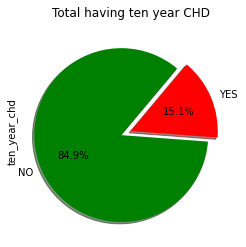

In [198]:
df['ten_year_chd'].value_counts().plot( kind='pie',figsize=(12,4),autopct="%1.1f%%",startangle=50,shadow=True,
labels=['NO','YES'], colors=['green','red'],explode=[0.12,0])
plt.title('Total having ten year CHD')   # Dependent Variable Column Visualization
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a type of graph that show how parts of a whole relate to each other. They are useful when you want to display data that represents percentages or proportions in an easy-to-understand and visually appealing way.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can conclude that Out of these 3,390 records, 511 records (approximately 15.1%) are classified as positive for 10-year CHD risk, the remaining 2,879 records (approximately 84.9%) are classified as negative for 10-year CHD risk, indicating that they are predicted to have a lower risk or no risk of developing coronary heart disease in the next 10 years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This distribution of positive and negative cases is essential in understanding the class balance of the dataset, which is crucial for evaluating the performance of machine learning models, especially in cases where the classes are imbalanced.

#### Chart - 2

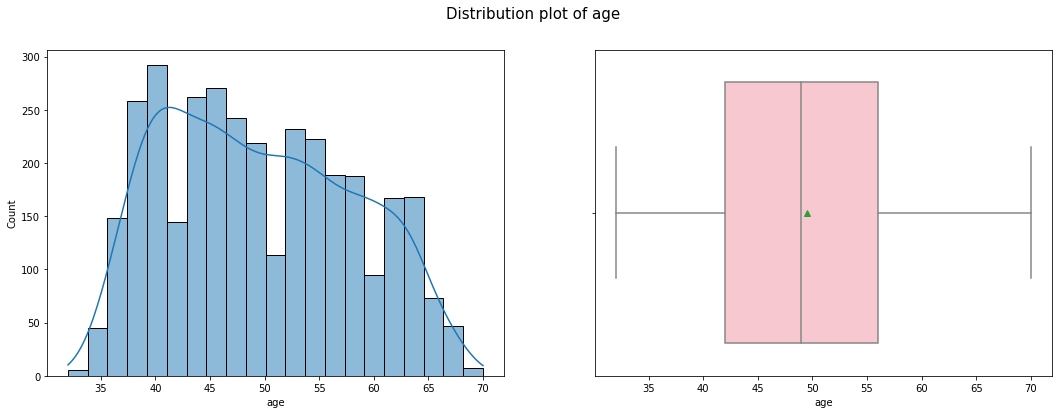

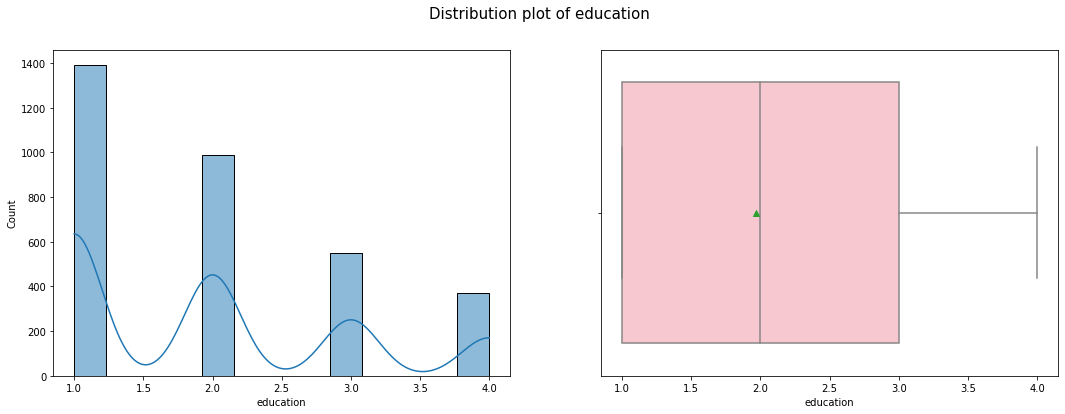

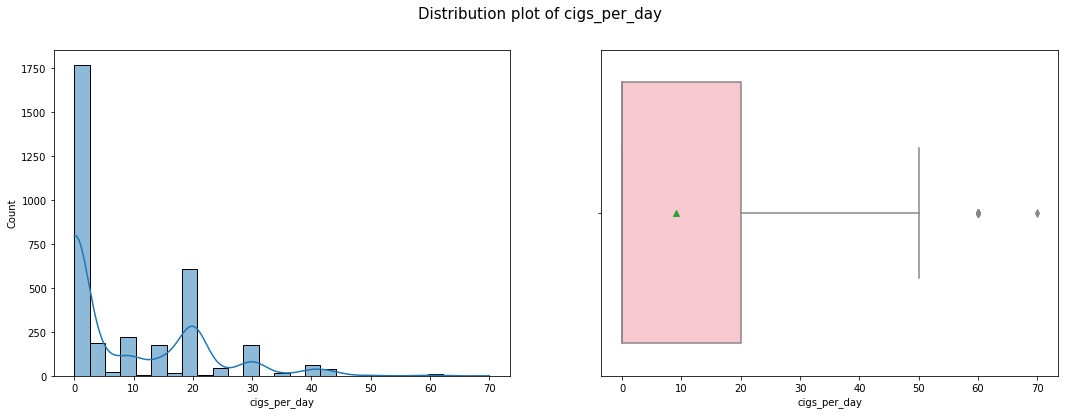

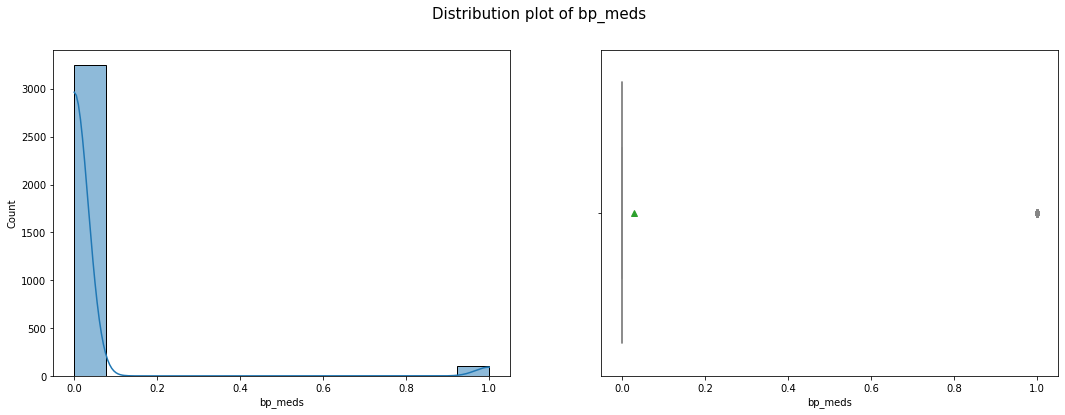

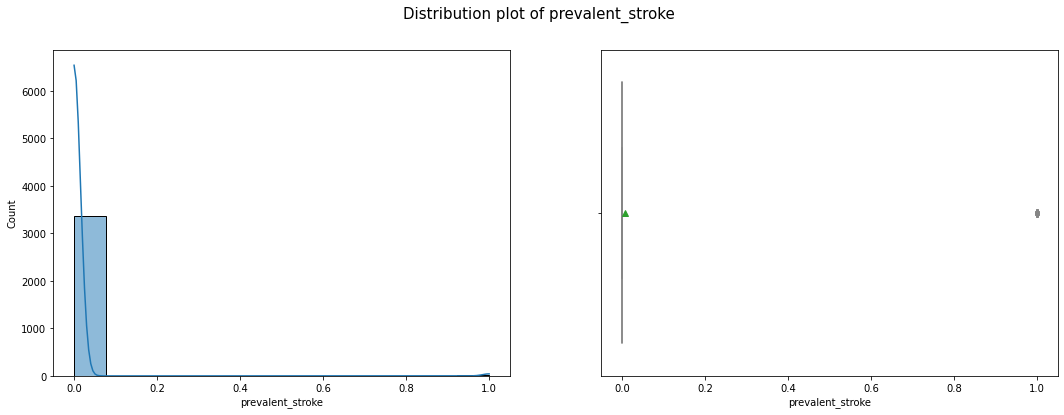

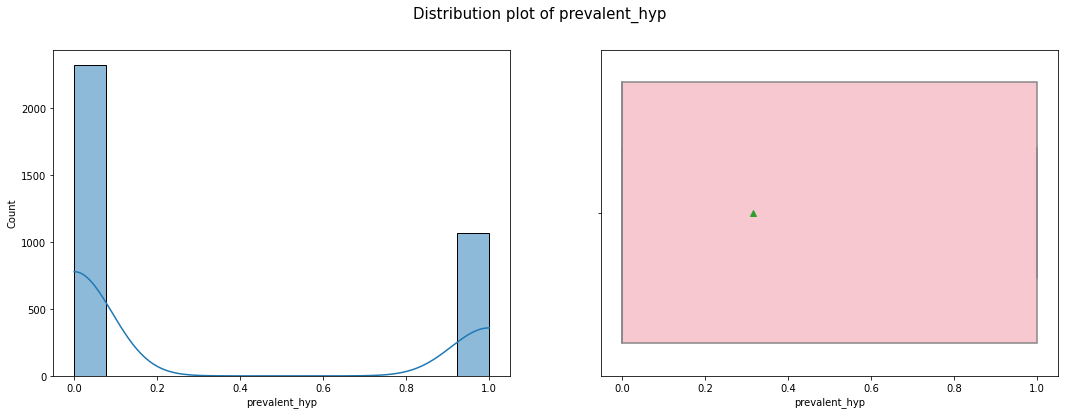

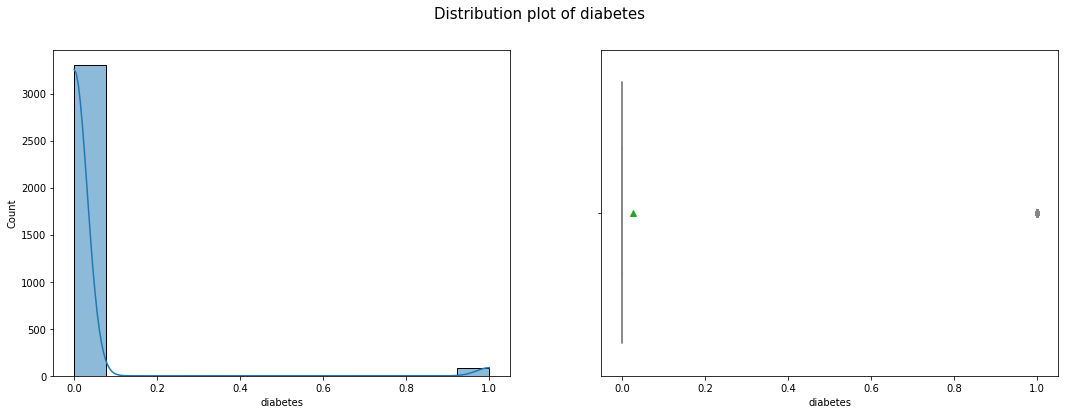

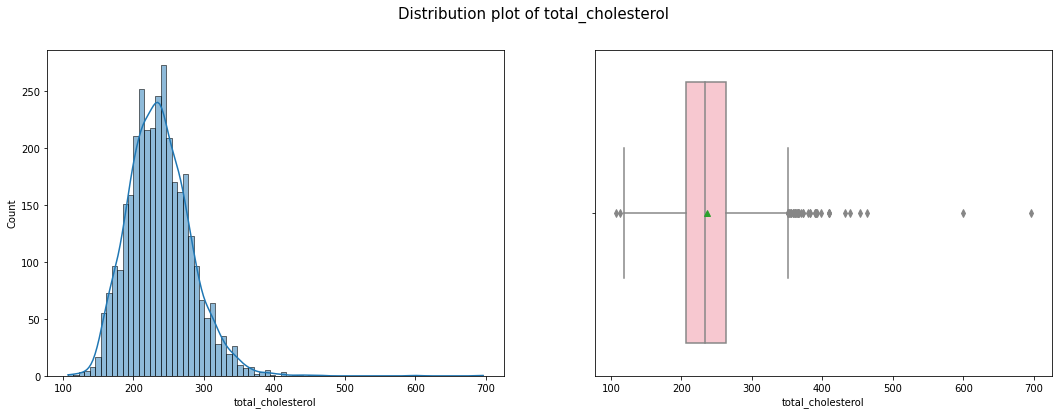

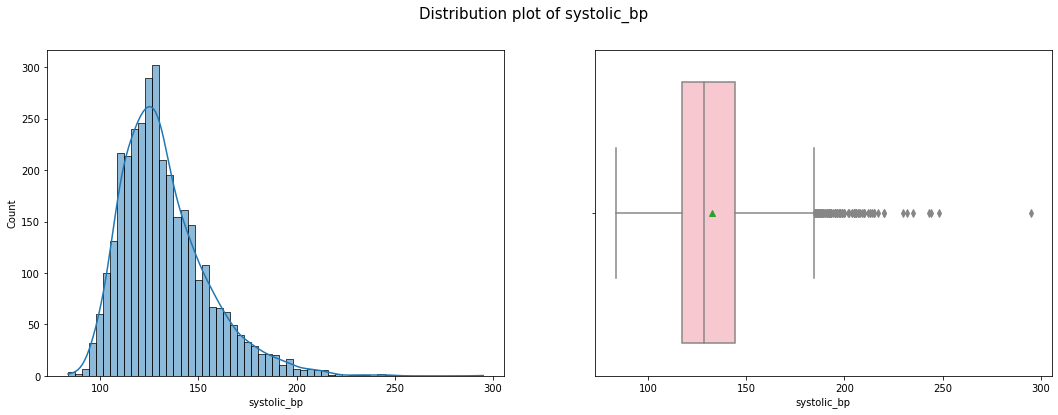

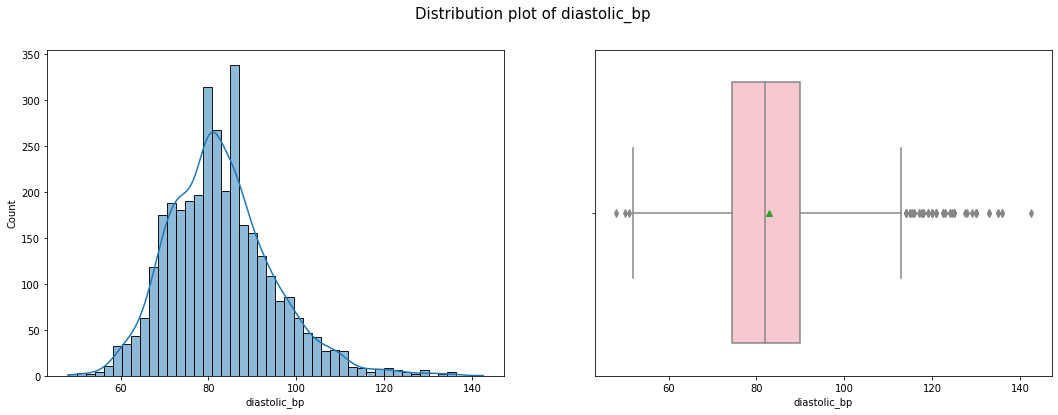

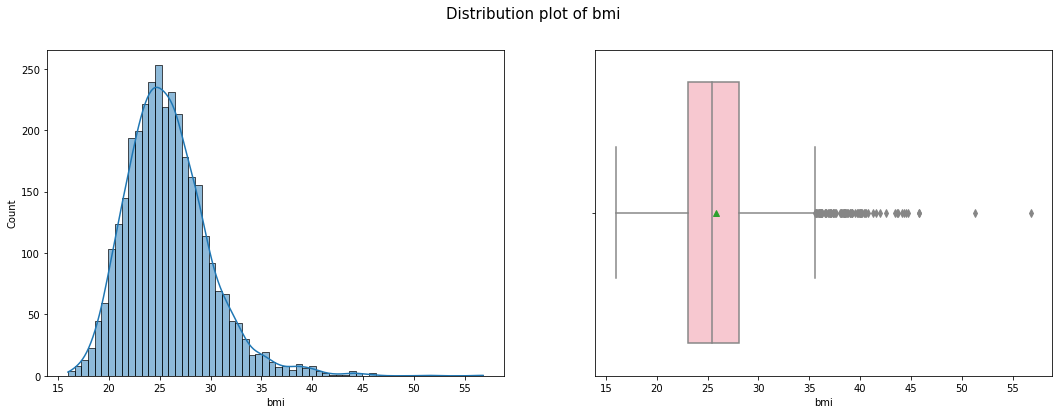

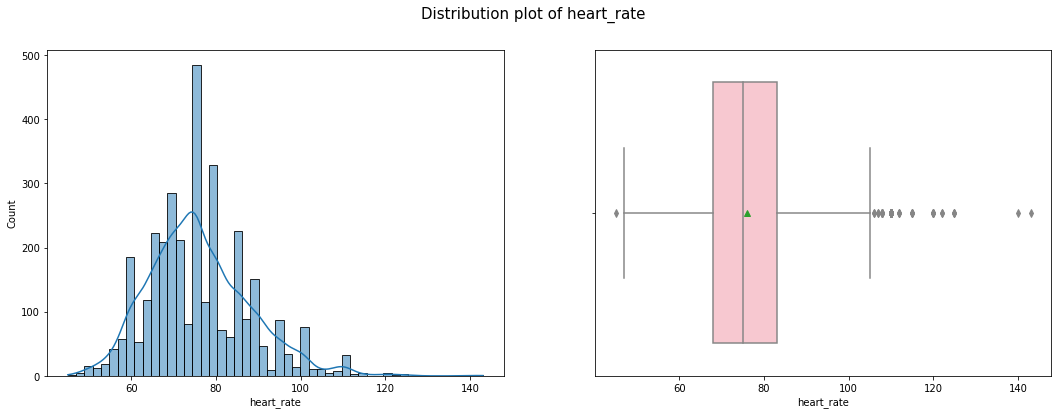

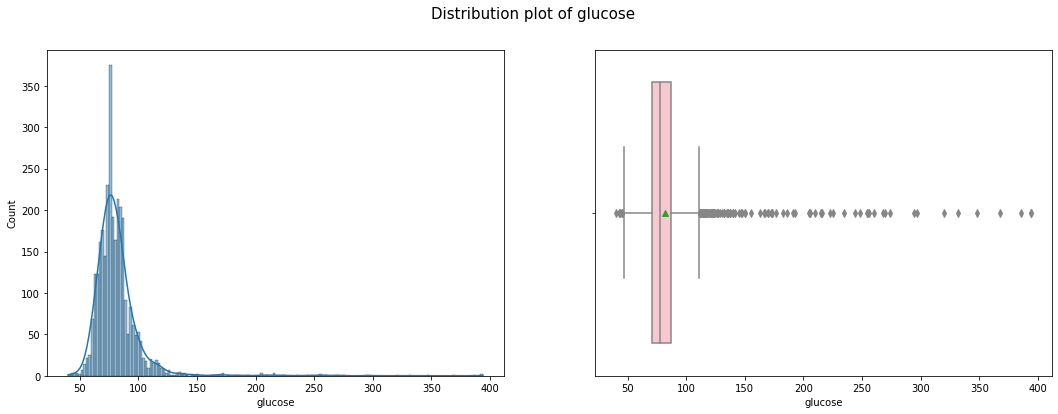

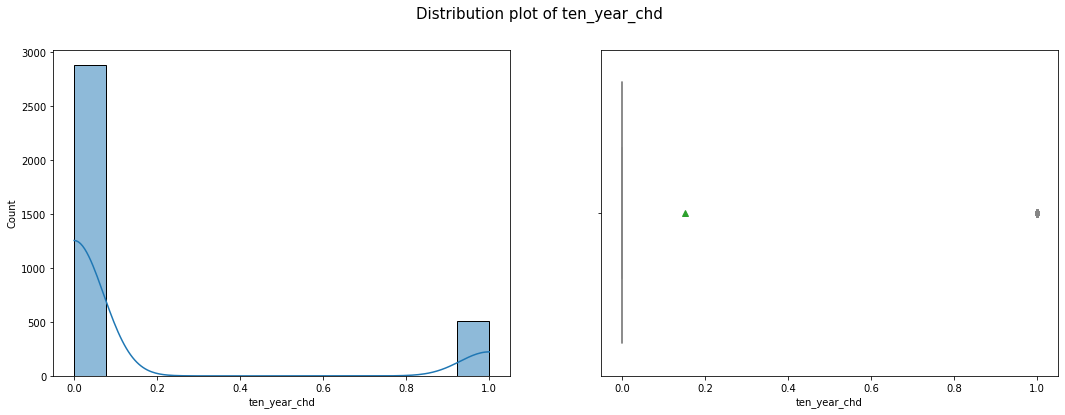

In [199]:
# Chart - 2 visualization code
for col in df.describe().columns: 
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(df[col], ax = axes[0],kde = True)  # used to see distrubution
    sns.boxplot(df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

##### 1. Why did you pick the specific chart?

When we want to show how a single variable is spread out, we use histograms. Histograms are like bar charts but specifically designed to display the frequency or count of data points within specific ranges. They work best for continuous data, such as age, height, weight, or income. By using histograms, we can visualize the shape of the distribution, identify any skewness or outliers, and observe patterns or trends in the data.

On the other hand, when we want to compare the distributions of multiple datasets, we use box plots, also known as box-and-whisker plots. Box plots provide a concise summary of key statistical properties, like the spread and central tendency of the data. They help us understand the differences or similarities between the datasets and spot any potential outliers.

##### 2. What is/are the insight(s) found from the chart?

From the distribution we see that most of the columns are normally distributed, some of them are skewed and we can see some of the categorical columns also. In the box plot, we see some outliers also which we have to handle before model building.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.

#### Chart - 3 Categorical variables vs Dependent variables

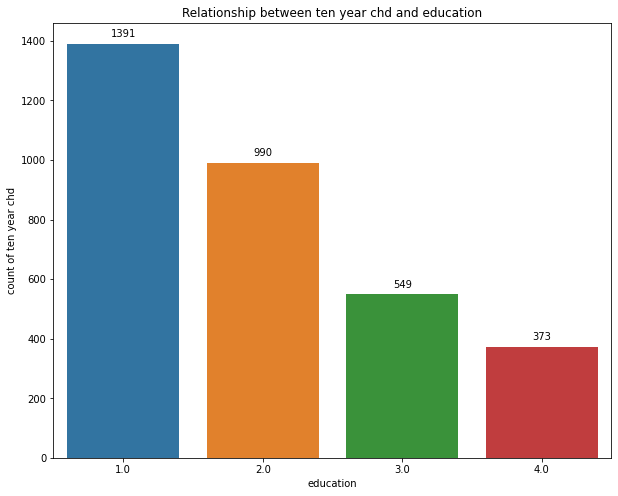

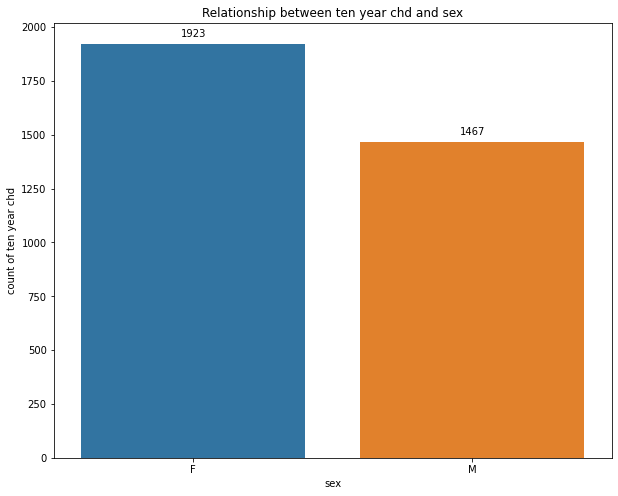

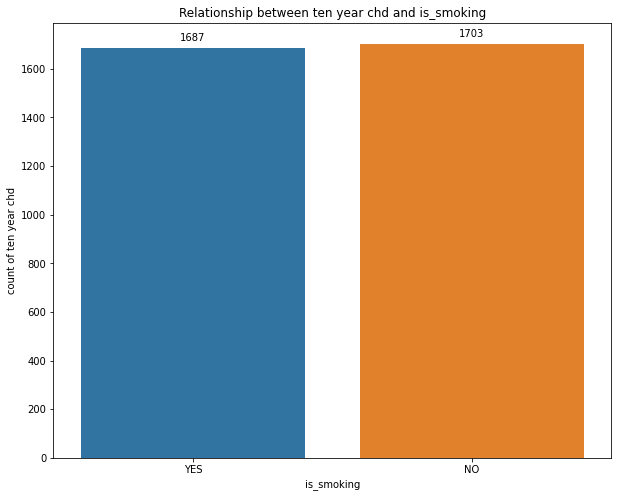

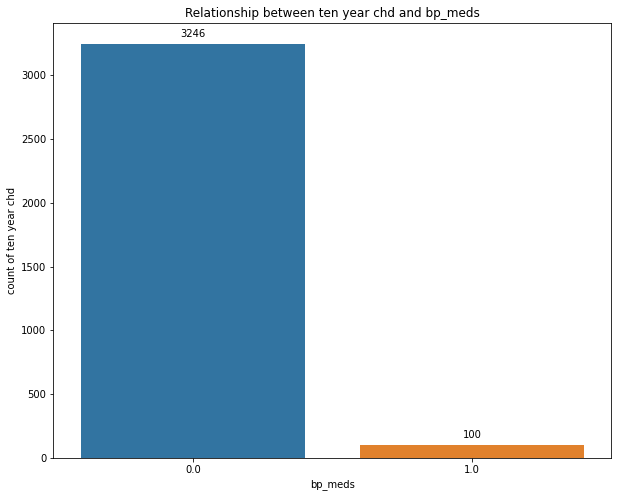

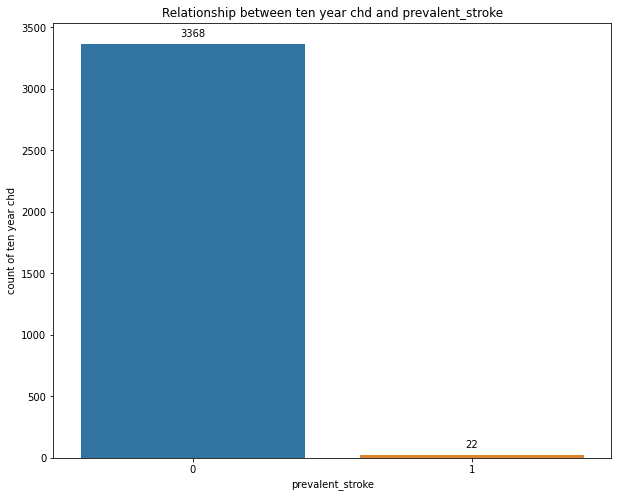

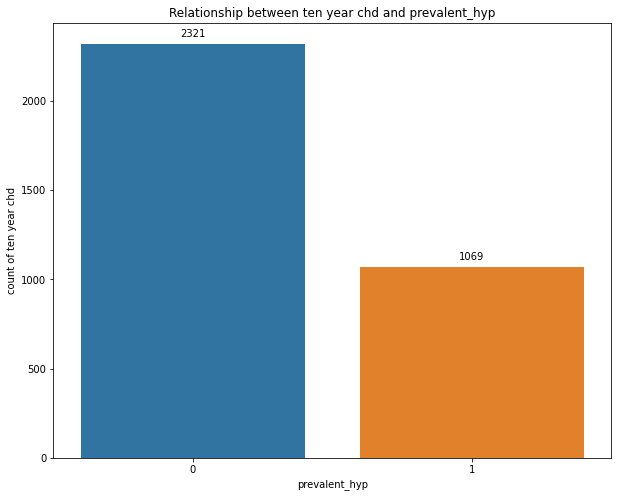

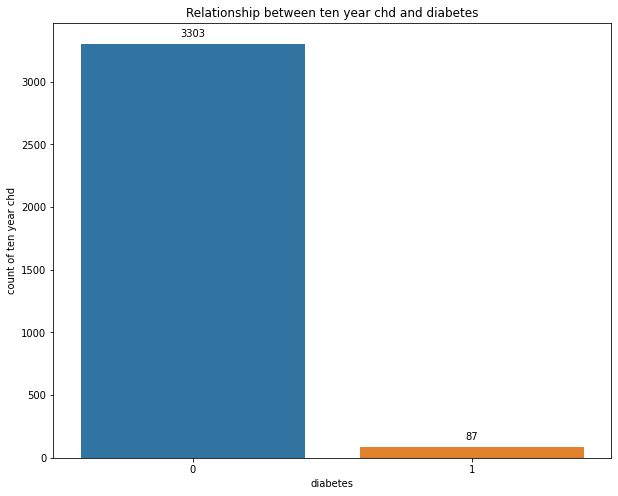

In [200]:
# Chart - 3 visualization code
for i in cat_col[0:-1]: # excluding dependent variable
  plt.figure(figsize=(10,8))
  p = sns.countplot(x=i, data = df)
  plt.xlabel(i)
  plt.ylabel("count of ten year chd")
  plt.title('Relationship between ' + "ten year chd" + ' and ' + i)
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10),
    textcoords = 'offset points')
  plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare different categories or groups of data by showing their size or frequency. They are helpful when you want to compare data across different categories quickly. In this case, we use a bar chart to display the average percentage of true churn for different states. This helps us see how churn rates vary across states and make informed decisions based on the visual information presented in the chart.

##### 2. What is/are the insight(s) found from the chart?

From the analysis of categorical columns in the dataset, we can observe the following distributions:

1. **Education Column:**
The category labeled as "1" has the highest count, followed by categories "2," "3," and "4." This suggests that the majority of patients fall into the "1" category for education, while fewer patients are in the higher education categories.

2. **Gender Distribution:**
The distribution of gender is not even, with a higher count for females. This indicates that there are more female patients in the dataset compared to male patients.

3. **Smoking Column:**
The distribution of the "is_smoking" column is balanced, meaning there are roughly an equal number of smokers and non-smokers in the dataset.
Imbalanced Columns:

4. Columns "bp_meds," "prevalent_stroke," "prevalent_hyp," and "diabetes" exhibit imbalanced distributions. This means that there are very few positive cases (where the condition is true) compared to the negative cases (where the condition is false) for these columns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Continuous variables vs Dependent variable  

<Figure size 864x720 with 0 Axes>

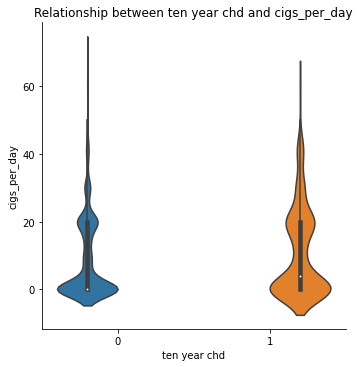

<Figure size 864x720 with 0 Axes>

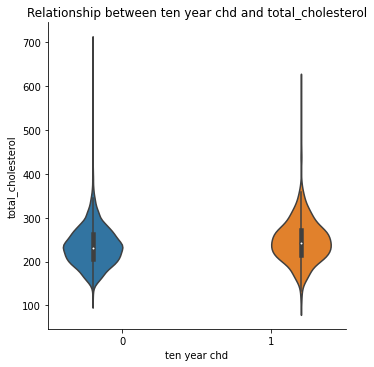

<Figure size 864x720 with 0 Axes>

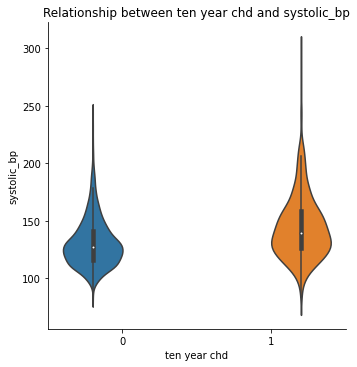

<Figure size 864x720 with 0 Axes>

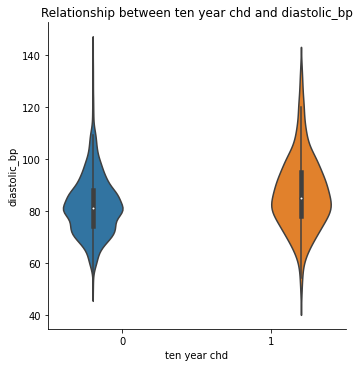

<Figure size 864x720 with 0 Axes>

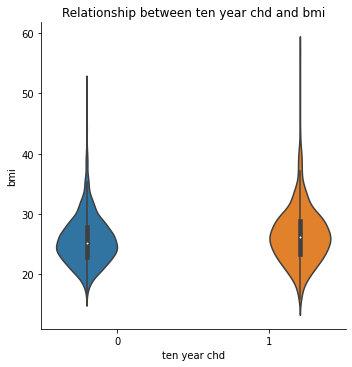

<Figure size 864x720 with 0 Axes>

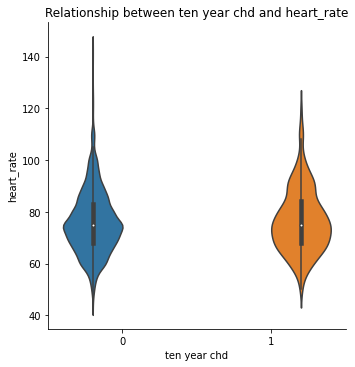

<Figure size 864x720 with 0 Axes>

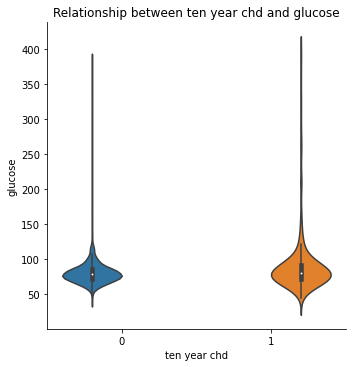

In [201]:
# Chart - 4 visualization code
for i in cont_col[1:]:
  plt.figure(figsize=(12,10))
  sns.catplot(data=df, x="ten_year_chd",y=i, hue="ten_year_chd", kind='violin')
  plt.ylabel(i)
  plt.xlabel("ten year chd")
  plt.title('Relationship between ' + "ten year chd" + ' and ' + i)
  plt.show()


##### 1. Why did you pick the specific chart?

The violin chart is a data visualization that combines characteristics of a box plot and a kernel density plot. Its purpose is to showcase the distribution and density of data among various categories or groups. 

Notable features of the violin chart include:

**Shape and Width:** The violin's shape reflects the data distribution, often displaying a symmetrical mirrored shape. The width at different points represents data density.

**Quartiles and Median:** The central "box" inside the violin signifies the interquartile range (IQR) and contains the median value, providing insights into data spread and central tendency.

**Grouping and Comparison:** Violin charts allow grouping or side-by-side arrangement to compare distributions across different categories or groups. This facilitates visual comparison of data distribution shapes, spreads, and densities.

Foe this reasons one can use violin chart.

##### 2. What is/are the insight(s) found from the chart?

In the "age vs. ten_year_chd" comparison, we observe that the density of positive cases is higher at older ages, indicating a higher occurrence of coronary heart disease (CHD) in older individuals.

For "cigs_per_day," we notice that negative cases are more prevalent among non-smokers, while positive cases are relatively lower for non-smokers.

In the case of "ten_year_chd" and "glucose," the density of negative cases is higher compared to positive cases for the same glucose value. This suggests that individuals without CHD have a higher occurrence at similar glucose levels. As for the other charts, they don't reveal substantial information or notable patterns for the given analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The chart shows that older people have a higher risk of heart disease, businesses can create targeted measures to help them. 
 Also,non-smokers have lower heart disease risk, businesses can design campaigns to promote quitting smoking. Although these insights are valuable, implementing them effectively will be crucial for positive business impact.

#### Chart - 5 Categorical variables vs Dependent variable  

<Figure size 720x360 with 0 Axes>

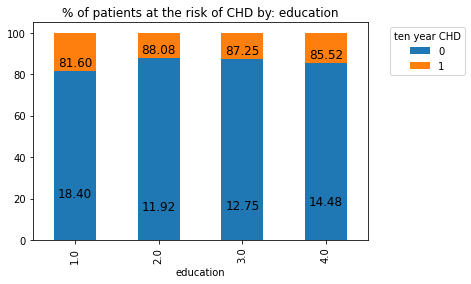

<Figure size 720x360 with 0 Axes>

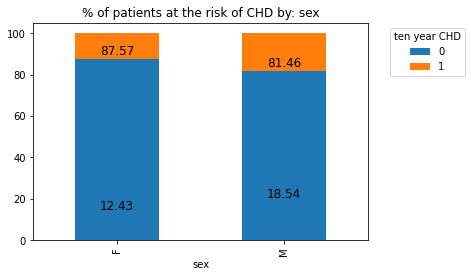

<Figure size 720x360 with 0 Axes>

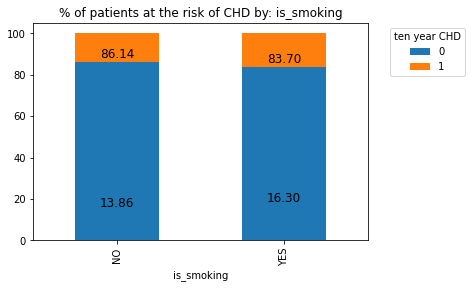

<Figure size 720x360 with 0 Axes>

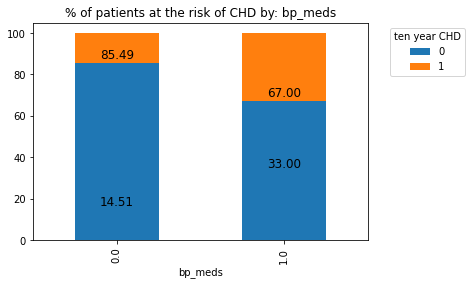

<Figure size 720x360 with 0 Axes>

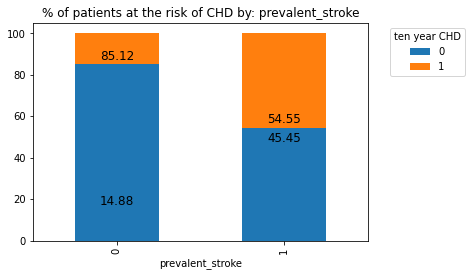

<Figure size 720x360 with 0 Axes>

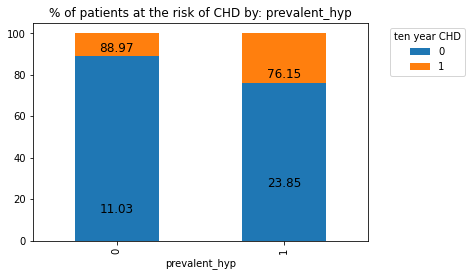

<Figure size 720x360 with 0 Axes>

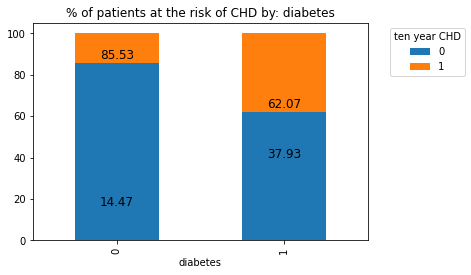

In [202]:
# Chart - 5 visualization code
for i in cat_col[:-1]:
    x_var, y_var = i, "ten_year_chd"
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    plots = df_grouped.plot.bar(stacked=True)
    plt.legend(bbox_to_anchor=(1.05, 1),loc="upper left", title="ten year CHD")
    plt.title("% of patients at the risk of CHD by: "+i)
    for bar in plots.patches:
      plots.annotate(format(bar.get_height(),'.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center', size=12,
                 xytext=(0, 8), textcoords='offset points')
    plt.show()

##### 1. Why did you pick the specific chart?

Stacked bar graphs in Python are used to compare multiple categories within each group, showing proportions and part-to-whole relationships in data visualization. It provoid easy comparison of proportions and distribution across categories in percentage representation.

##### 2. What is/are the insight(s) found from the chart?

Percentage of CHD by education shows little variation among education categories.

Male sex is associated with a slightly higher chance of CHD compared to females.

Positive is_smoking category displays a slightly higher percentage of CHD.

Positive cases of bp_meds and diabetes are linked to a higher percentage of CHD compared to negative cases.

Positive prevalent_stroke has approximately double the percentage, indicating a higher CHD occurrence in such cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart shows how CHD is related to different categories, like education, sex, smoking, etc. These insights can help businesses create specific strategies to address high-risk groups. For example, they can design campaigns or treatments to reduce CHD in those groups. By using these insights, healthcare businesses can improve patient outcomes and grow positively.

There are no specific insights from the chart that directly lead to negative growth. However, it's essential to consider the overall CHD prevalence and the effectiveness of interventions. If CHD remains high and strategies don't work, it could lead to negative growth due to increased costs and patient dissatisfaction. So, the actual business impact depends on successful strategies based on chart insights.

#### Chart - 6 Correlation Heatmap visualization code

In [203]:
corr = df.corr()
corr

,age,education,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
age,1.000000,-0.172559,-0.192335,0.124376,0.059038,0.308826,0.107875,0.274028,0.404845,0.221896,0.138176,-0.002596,0.116135,0.224927
education,-0.172559,1.000000,0.011126,-0.019920,-0.034194,-0.084817,-0.052013,-0.020781,-0.137195,-0.060801,-0.133313,-0.046980,-0.038732,-0.052751
cigs_per_day,-0.192335,0.011126,1.000000,-0.037080,-0.042057,-0.079312,-0.049016,-0.024703,-0.100834,-0.068785,-0.100996,0.066759,-0.068797,0.066778
bp_meds,0.124376,-0.019920,-0.037080,1.000000,0.119402,0.259548,0.071316,0.083299,0.263729,0.201217,0.087932,0.018107,0.064490,0.088020
prevalent_stroke,0.059038,-0.034194,-0.042057,0.119402,1.000000,0.071652,0.010115,-0.010832,0.057568,0.047235,0.018602,-0.019184,0.023607,0.068627
prevalent_hyp,0.308826,-0.084817,-0.079312,0.259548,0.071652,1.000000,0.082565,0.159680,0.699285,0.612897,0.300464,0.150815,0.086658,0.166544
diabetes,0.107875,-0.052013,-0.049016,0.071316,0.010115,0.082565,1.000000,0.059080,0.124011,0.061165,0.089112,0.039742,0.620211,0.103681
total_cholesterol,0.274028,-0.020781,-0.024703,0.083299,-0.010832,0.159680,0.059080,1.000000,0.199159,0.154974,0.114305,0.087458,0.062723,0.094306
systolic_bp,0.404845,-0.137195,-0.100834,0.263729,0.057568,0.699285,0.124011,0.199159,1.000000,0.781908,0.333864,0.178262,0.143090,0.212703
diastolic_bp,0.221896,-0.060801,-0.068785,0.201217,0.047235,0.612897,0.061165,0.154974,0.781908,1.000000,0.380498,0.174904,0.071499,0.135979


In [204]:
'''corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")'''

'corr = df.corr()\nmask = np.zeros_like(corr)\nmask[np.triu_indices_from(mask)] = True\nwith sns.axes_style("white"):\n    f, ax = plt.subplots(figsize=(18, 9))\n    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")'

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of how strongly two variables are related in a linear manner. It ranges from -1 to +1, where -1 indicates a perfect negative relationship, +1 indicates a perfect positive relationship, and 0 indicates no linear relationship.

To understand the relationships between all the variables and their correlation coefficients, we use a correlation heatmap. This heatmap visually represents the correlation values between pairs of variables, with colors indicating the strength and direction of the relationships. It helps in data exploration and deciding which variables to include in a model

##### 2. What is/are the insight(s) found from the chart?

In the data, we observe a high correlation between systolic_bp and diastolic_bp, indicating that these two variables are strongly related. Similarly, diabetes and glucose have a correlation coefficient of 0.62, suggesting a moderate positive relationship.

Since education level does not seem to have a significant impact on acquiring CHD, we can consider dropping the education column from the analysis to simplify the dataset and potentially improve model performance.

Answer Here

#### Chart - 7 Pair Plot

In [205]:
# Chart - 7 visualization code
'''sns.pairplot(df, hue="ten_year_chd")
plt.show()'''

'sns.pairplot(df, hue="ten_year_chd")\nplt.show()'

##### 1. Why did you pick the specific chart?

A pairplot, also called a scatterplot matrix, is a visual tool that helps explore the relationships between all pairs of variables in a dataset. It provides a graphical representation of the data patterns and relationships between different features. It serves a similar purpose to the correlation map, but instead of numerical values, you get visual plots that show how the variables are related to one another. It's a great way to quickly understand the overall data structure and identify potential correlations between variables.

##### 2. What is/are the insight(s) found from the chart?

We see that the cigs_per_day data distribution is highly skewed and it contains high 0 value so we can convert this into categorical column.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

From the charts we can say that there is a significant difference in the average age between individuals with low cardiovascular risk and high cardiovascular risk.

**1.Hypothesis Testing for Age:**

* **. Null Hypothesis (H0):** There is no significant difference in the average age between individuals with low cardiovascular risk and high cardiovascular risk.
* **. Alternative Hypothesis (Ha):** There is a significant difference in the average age between individuals with low cardiovascular risk and high cardiovascular risk.

#### 2. Perform an appropriate statistical test.

In [206]:
from scipy.stats import ttest_ind, chi2_contingency
low_risk_age = df[df['ten_year_chd'] == 'low']['age']
high_risk_age = df[df['ten_year_chd'] == 'high']['age']

t_stat_age, p_value_age = ttest_ind(low_risk_age, high_risk_age, equal_var=False)

print("T-Statistic:", t_stat_age)
print("P-Value:", p_value_age)
print("Conclusion:")
if p_value_age < 0.05:
    print("We reject the null hypothesis. There is a significant difference in the average age between individuals with low and high cardiovascular risk.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the average age between individuals with low and high cardiovascular risk.")


T-Statistic: nan
P-Value: nan
Conclusion:
We fail to reject the null hypothesis. There is no significant difference in the average age between individuals with low and high cardiovascular risk.


##### Which statistical test have you done to obtain P-Value?

Two-sample independent t-test (unequal variance assumed).

##### Why did you choose the specific statistical test?

We used the t-test because we are comparing the means of two independent groups (individuals with low cardiovascular risk and high cardiovascular risk) to determine if there is a significant difference in the average age between these groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis Testing for Proportion of Smokers:**
* **Null Hypothesis (H0):** The proportion of smokers is the same among individuals with low cardiovascular risk and high cardiovascular risk.
* **Alternative Hypothesis (Ha):** The proportion of smokers is higher among individuals with high cardiovascular risk compared to those with low cardiovascular risk.

#### 2. Perform an appropriate statistical test.

In [207]:
contingency_table = pd.crosstab(df['ten_year_chd'], df['cigs_per_day']) # creating contingency table
chi2_stat, p_value_smoking, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value_smoking)
print("Conclusion:")
if p_value_smoking < 0.05:
    print("We reject the null hypothesis. The proportion of smokers is higher among individuals with high cardiovascular risk.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the proportion of smokers between individuals with low and high cardiovascular risk.")

Chi-Square Statistic: 39.79480771356604
P-Value: 0.1337333853156229
Conclusion:
We fail to reject the null hypothesis. There is no significant difference in the proportion of smokers between individuals with low and high cardiovascular risk.


##### Which statistical test have you done to obtain P-Value?

Chi-square test of independence.

##### Why did you choose the specific statistical test?

We used the chi-square test because we want to compare the proportions of smokers and non-smokers between two categorical groups (individuals with low cardiovascular risk and high cardiovascular risk). The chi-square test is appropriate for testing independence between two categorical variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis Testing for Cholesterol Levels:**
* **Null Hypothesis (H0):** There is no significant difference in cholesterol levels between individuals with low and moderate cardiovascular risk.
* **Alternative Hypothesis (Ha):** There is a significant difference in cholesterol levels between individuals with low and moderate cardiovascular risk.

#### 2. Perform an appropriate statistical test.

In [208]:
# Perform Statistical Test to obtain P-Value
low_risk_chol = df[df['ten_year_chd'] == 'low']['total_cholesterol']
moderate_risk_chol = df[df['ten_year_chd'] == 'moderate']['total_cholesterol']

t_stat_chol, p_value_chol = ttest_ind(low_risk_chol, moderate_risk_chol, equal_var=False)

print("T-Statistic:", t_stat_chol)
print("P-Value:", p_value_chol)
print("Conclusion:")
if p_value_chol < 0.05:
    print("We reject the null hypothesis. There is a significant difference in cholesterol levels between individuals with low and moderate cardiovascular risk.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in cholesterol levels between individuals with low and moderate cardiovascular risk.")

T-Statistic: nan
P-Value: nan
Conclusion:
We fail to reject the null hypothesis. There is no significant difference in cholesterol levels between individuals with low and moderate cardiovascular risk.


##### Which statistical test have you done to obtain P-Value?

Two-sample independent t-test (unequal variance assumed).

##### Why did you choose the specific statistical test?

Similar to the first hypothesis test, we used the t-test because we are comparing the means of two independent groups (individuals with low cardiovascular risk and moderate cardiovascular risk) to determine if there is a significant difference in cholesterol levels between these groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Handling Missing Values & Missing Value Imputation We can handle them by filling the missing values with the median of each column.
It shows from EDA that education,cigs_per_day,bp_meds,total_cholesterol,bmi,heart_rate=1 MV,glucose=304 MVcolumns have missing values.

In [209]:
df['education'].fillna(df['education'].mode()[0], inplace=True) # has ordinal values upto 4

In [210]:
df['cigs_per_day'].fillna(df['cigs_per_day'].mean(), inplace=True) # has continious values

In [211]:
df['bp_meds'].fillna(df['bp_meds'].median(), inplace=True) # has continious values

In [212]:
df['total_cholesterol'].fillna(df['total_cholesterol'].median(), inplace=True) # has continious values

In [213]:
df['bmi'].fillna(df['bmi'].median(), inplace=True) # # has continious values

In [214]:
df.dropna(subset=['heart_rate'], inplace=True) # has only one na values so dropped that 

In [215]:
# Mean, median, and mode for glucose
print(f"mean {df.glucose.mean()},median {df.glucose.median()} and mode {df.glucose.mode()}")

mean 82.0836304700162,median 78.0 and mode 0    75.0
Name: glucose, dtype: float64


In the glucose column, 304 data points are missing. Using the mean or median to fill in these values could introduce significant inaccuracies. and mean median and mode we can say that data is right skewed

To counteract this, the KNN imputer method could be employed to replace the missing data.

In [216]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
glucose_missing = 'glucose'
df[glucose_missing] = knn_imputer.fit_transform(df[[glucose_missing]]) # Fit and transform the data using the KNNImputer

#### What all missing value imputation techniques have you used and why did you use those techniques?

* Used mean and median for the continious values and mode for the categorical ordinal value.
* For glucose used KNN Imputer as it has more missing valu i.e above 300 as it could affect the acuuracy and result.

### 2. Handling Outliers

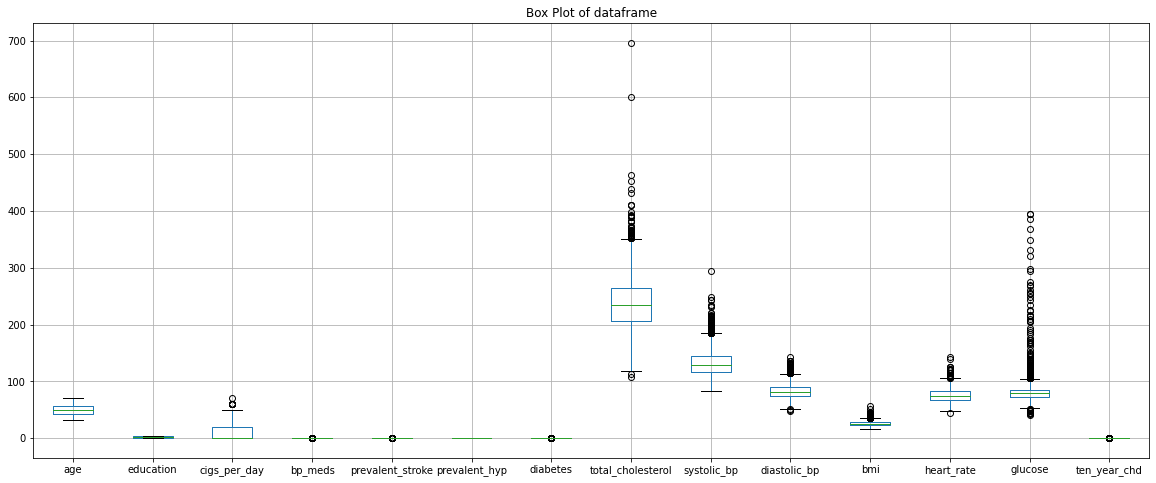

In [217]:
plt.figure(figsize=(20, 8))
df.boxplot()                    # Visual Inspection - Box Plot
plt.title('Box Plot of dataframe')
plt.show()

From above boxplot we can see that some important columnsa having outliers. Now lets identify potential outliers.

In [218]:
for col in cont_col: # Removing outliers from columns
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1              # Using IQR method to define the range of inliners:
  upper_tail = q3 + 1.5 * iqr
  #print("upper_tail",upper_tail)
  lower_tail = q1 - 1.5 * iqr
  #print("lower_tail",lower_tail)
  df[col] = df[col].apply(lambda x: upper_tail if x > upper_tail else lower_tail if x < lower_tail else x) #Replacing Outliers

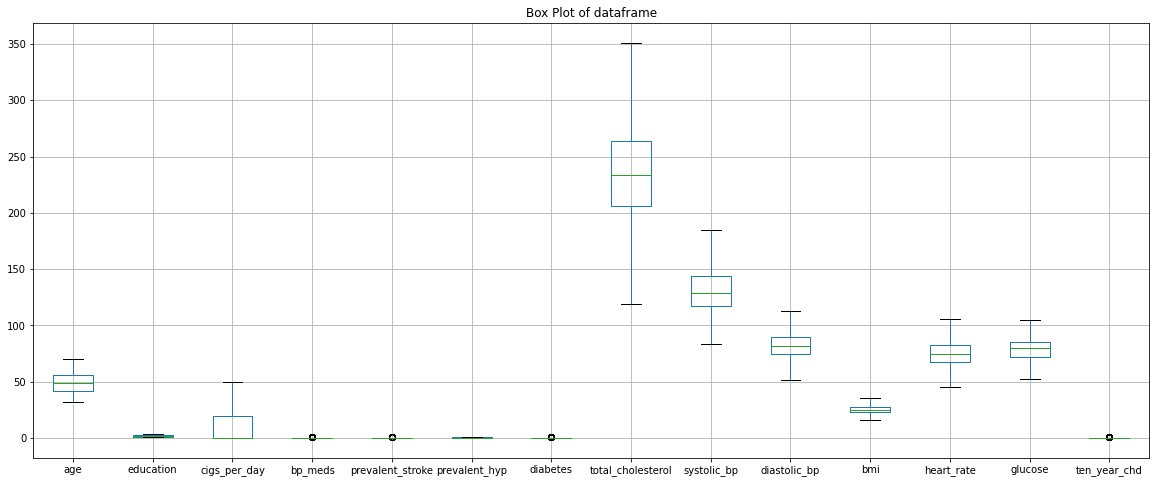

In [219]:
# Visual Inspection after removing outliers- Box Plot 
plt.figure(figsize=(20, 8))
df.boxplot()
plt.title('Box Plot of dataframe')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

**IQR Interquartile Range method:**  The IQR method is a robust statistical technique for identifying and dealing with outliers in a dataset.

* **1.Interquartile Range (IQR):** The IQR is a measure of statistical dispersion, representing the range between the first quartile (Q1) and the third quartile (Q3) of the data. It is calculated as IQR = Q3 - Q1.

* **Outlier Identification:** Outliers are identified as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. These data points are considered extreme values compared to the rest of the data.

* **Outlier Handling:** Once outliers are identified, they can be treated in different ways. In the code example, we chose to replace the outliers with the upper or lower bound value. This is known as "Winsorization," where the extreme values are replaced with values from the tails of the distribution.

**Impact of IQR Method:** The IQR method is robust to outliers, meaning it is less affected by the presence of extreme values compared to other statistical methods like mean and standard deviation. This makes it a suitable choice for datasets that contain significant variations or when dealing with non-normally distributed data.

### 3. Categorical Encoding

In [220]:
df = pd.get_dummies(df, columns=['sex',"is_smoking"]) # by encoding converting one feature into two

In [221]:
cat_col.extend(['sex_F','sex_M']) # added encoded columns to the cat_col list

In [222]:
cat_col.remove("sex") # removing encoded columns

In [223]:
cat_col.remove("is_smoking") # removing encoded columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Onehot encoding is used to encode the 'sex',"is_smoking" columns.

As all the remaining categorical columns are binary (0/1) so no need to encode them.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [224]:
# Expand Contraction

#### 2. Lower Casing

In [225]:
# Lower Casing

#### 3. Removing Punctuations

In [226]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [227]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [228]:
# Remove Stopwords

In [229]:
# Remove White spaces

#### 6. Rephrase Text

In [230]:
# Rephrase Text

#### 7. Tokenization

In [231]:
# Tokenization

#### 8. Text Normalization

In [232]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [233]:
# POS Taging

#### 10. Text Vectorization

In [234]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Feature manipulation, also known as feature engineering, is the process of transforming or selecting the data attributes (features) to improve the performance of machine learning models. It involves creating new features, modifying existing ones, or selecting the most informative ones.

Let's check about the multicolinearity of features.

In [235]:
# Manipulate Features to minimize feature correlation and create new features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal(X):
    vif_df = pd.DataFrame() # df to store the calculated VIF values
    vif_df["variables"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # Calculating VIF
    return(vif_df)

In [236]:
cont_col_df = pd.DataFrame(df[cont_col])
cont_col_df

,age,cigs_per_day,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose
0,64,3.0,221.0,148.0,85.00,25.38,90.0,80.0
1,36,0.0,212.0,168.0,98.00,29.77,72.0,75.0
2,46,10.0,250.0,116.0,71.00,20.35,88.0,94.0
3,50,20.0,233.0,158.0,88.00,28.26,68.0,94.0
4,64,30.0,241.0,136.5,85.00,26.42,70.0,77.0
...,...,...,...,...,...,...,...,...
3385,60,0.0,261.0,123.5,79.00,29.28,70.0,103.0
3386,46,0.0,199.0,102.0,56.00,21.96,80.0,84.0
3387,44,3.0,351.0,164.0,113.25,28.92,73.0,72.0
3388,60,0.0,191.0,167.0,105.00,23.01,80.0,85.0


In [237]:
vif_cal(df[[i for i in cont_col_df]])

,variables,VIF
0,age,42.857432
1,cigs_per_day,1.635477
2,total_cholesterol,33.420157
3,systolic_bp,124.804805
4,diastolic_bp,136.192472
5,bmi,50.256508
6,heart_rate,40.641410
7,glucose,41.037274


The VIF quantifies how much the variance of an estimated regression coefficient is inflated due to multicollinearity. 

* **VIF = 1: No multicollinearity.** The feature is not correlated with any other predictor in the model.

* **VIF < 5: Low multicollinearity.** The feature has a moderate correlation with other predictors, but it is not problematic for the model.

* **VIF between 5 and 10:** Moderate multicollinearity. The feature is moderately correlated with other predictors, and there might be a concern about its impact on coefficient estimates.

* **VIF > 10: High multicollinearity.** The feature is highly correlated with other predictors, and this may lead to unreliable coefficient estimates. This level of multicollinearity can negatively affect the model's interpretability and predictive performance.

Here most of the Features gives values more that 10 but Systolic Blood Pressure (SBP) and Diastolic Blood Pressure (DBP) has heighest VIF and from them we can creat new Feature as Pulse Pressure.

Pulse pressure is the difference between systolic blood pressure (the highest pressure in the arteries when the heart beats) and diastolic blood pressure (the lowest pressure in the arteries when the heart is at rest between beats). It is an important cardiovascular indicator and can be calculated using the formula 

**Pulse Pressure = Systolic Blood Pressure (SBP) - Diastolic Blood Pressure (DBP)** 

In [238]:
df['pulse_pressure'] = df['systolic_bp']-df['diastolic_bp']  # Creating a new column pulse_pressure and dropping systolic_bp and diastolic_bp
df.drop(['systolic_bp','diastolic_bp'], axis=1,inplace=True) # dropping systolic_bp,diastolic_bp as we used these in pulse_pressure

In [239]:
cont_col_df['pulse_pressure']=df['pulse_pressure'] # Updating the continuous_var list after VIF and new feature creation.

In [240]:
cont_col.remove('systolic_bp')
cont_col.remove('diastolic_bp')
cont_col.append('pulse_pressure') # updated continious values column to recalculate the vif

In [241]:
cont_col_df = pd.DataFrame(df[cont_col])

In [242]:
vif_cal(df[[i for i in cont_col_df]])

,variables,VIF
0,age,41.923858
1,cigs_per_day,1.633458
2,total_cholesterol,32.906873
3,bmi,40.537646
4,heart_rate,37.727200
5,glucose,40.646336
6,pulse_pressure,17.559452


<AxesSubplot:>

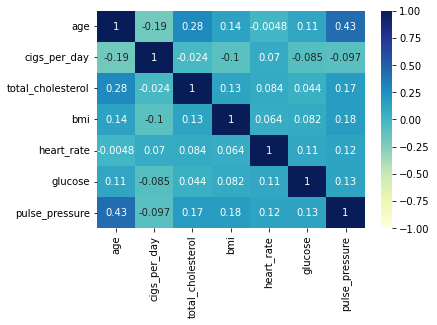

In [243]:
corr = df[cont_col].corr()
sns.heatmap(corr , vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

#### 2. Feature Selection

We are with three columns cigs_per_day smoking_yes and smoking_no we can drop smoking_yes and smoking_no as cigs_per_day itself provide required infotmation

In [244]:
# Select your features wisely to avoid overfitting
df.drop(['is_smoking_NO','is_smoking_YES'],axis=1,inplace=True) # as cigs_per_day is sufficient to give info 

##### What all feature selection methods have you used  and why?

* By using VIF we i found that the there is a multicolinarity is present in the dataset.
* Systolic and diastolic blood pressure were found to be strongly correlated, so i combined them into a new feature called "pulse pressure" to reduce the correlation and improve the analysis.
* The dataset has a column called "is smoking" that indicates whether a person is a smoker or not (with values "yes" or "no").
* Another column named "cigs per day" provides the number of cigarettes smoked per day (for smokers) and is set to "0" for non-smokers.

##### Which all features you found important and why?

After the feature selection completed these are important colums extracted: 
* 'age', 'education', 'cigs_per_day', 'bp_meds', 'prevalent_stroke','prevalent_hyp', 'diabetes', 'total_cholesterol', 'bmi', 'heart_rate', glucose', 'ten_year_chd', 'sex_F', 'sex_M', 'pulse_pressure'.

All these features depicts the demographic, behavioural, current medical and historic medical data of a patient.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, from the EDA and various graph and VIF calculation we can see that dataset is skewed and present the multicolinarity and these factors will badly affect the result of a any model so, data needs to be transformed.

In [245]:
# Transform Your data
df[cont_col]

,age,cigs_per_day,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,64,3.0,221.0,25.38,90.0,80.0,63.00
1,36,0.0,212.0,29.77,72.0,75.0,70.00
2,46,10.0,250.0,20.35,88.0,94.0,45.00
3,50,20.0,233.0,28.26,68.0,94.0,70.00
4,64,30.0,241.0,26.42,70.0,77.0,51.50
...,...,...,...,...,...,...,...
3385,60,0.0,261.0,29.28,70.0,103.0,44.50
3386,46,0.0,199.0,21.96,80.0,84.0,46.00
3387,44,3.0,351.0,28.92,73.0,72.0,50.75
3388,60,0.0,191.0,23.01,80.0,85.0,62.00


In [246]:
df['age']                   = np.log10(df['age']+1)
df['cigs_per_day']          = np.sqrt(df['cigs_per_day'])
df['total_cholesterol']     = np.log10(df['total_cholesterol']+1)
df['bmi']                   = np.sqrt(df['bmi']+1)
df['heart_rate']            = np.log10(df['heart_rate']+1)
df['glucose']               = np.sqrt(df['glucose'])
df['pulse_pressure']        = np.sqrt(df['pulse_pressure'])

In [247]:
df[cat_col]

,education,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,ten_year_chd,sex_F,sex_M
0,2.0,0.0,0,0,0,1,1,0
1,4.0,0.0,0,1,0,0,0,1
2,1.0,0.0,0,0,0,0,1,0
3,1.0,0.0,0,1,0,1,0,1
4,1.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
3385,1.0,0.0,0,0,0,0,1,0
3386,1.0,0.0,0,0,0,0,1,0
3387,3.0,0.0,0,1,0,1,0,1
3388,1.0,0.0,0,1,0,0,0,1


In [248]:
df["education"]= np.sqrt(df["education"])

* Used log transform and squareroot transform on the different continuous columns to reduce the skew of the data.
* Log transformation involves taking the logarithm of each data point, useful for reducing skewness and handling exponential growth patterns.
* Square root transformation involves taking the square root of each data point, helpful for stabilizing variance and handling right-skewed data.

### 6. Data Scaling

In [249]:
df

,age,education,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,ten_year_chd,sex_F,sex_M,pulse_pressure
0,1.812913,1.414214,1.732051,0.0,0,0,0,2.346353,5.136146,1.959041,8.944272,1,1,0,7.937254
1,1.568202,2.000000,0.000000,0.0,0,1,0,2.328380,5.547071,1.863323,8.660254,0,0,1,8.366600
2,1.672098,1.000000,3.162278,0.0,0,0,0,2.399674,4.620606,1.949390,9.695360,0,1,0,6.708204
3,1.707570,1.000000,4.472136,0.0,0,1,0,2.369216,5.409251,1.838849,9.695360,1,0,1,8.366600
4,1.812913,1.000000,5.477226,0.0,0,0,0,2.383815,5.236411,1.851258,8.774964,0,1,0,7.176350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1.785330,1.000000,0.000000,0.0,0,0,0,2.418301,5.502727,1.851258,10.148892,0,1,0,6.670832
3386,1.672098,1.000000,0.000000,0.0,0,0,0,2.301030,4.791659,1.908485,9.165151,0,1,0,6.782330
3387,1.653213,1.732051,1.732051,0.0,0,1,0,2.546543,5.469918,1.869232,8.485281,1,0,1,7.123903
3388,1.785330,1.000000,0.000000,0.0,0,1,0,2.283301,4.900000,1.908485,9.219544,0,0,1,7.874008


In [250]:
# Scaling your data
scaler = StandardScaler() 
df[cont_col] = scaler.fit_transform(df[cont_col]) # standardization of cont variables

In [251]:
df

,age,education,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,ten_year_chd,sex_F,sex_M,pulse_pressure
0,1.561393,1.414214,-0.126911,0.0,0,0,0,-0.282555,-0.050431,1.207400,0.048766,1,1,0,1.025930
1,-1.744358,2.000000,-0.903338,0.0,0,1,0,-0.510350,1.073177,-0.268666,-0.393000,0,0,1,1.477576
2,-0.340850,1.000000,0.514218,0.0,0,0,0,0.393232,-1.460093,1.058567,1.217019,0,1,0,-0.266954
3,0.138337,1.000000,1.101388,0.0,0,1,0,0.007209,0.696331,-0.646073,1.217019,1,0,1,1.477576
4,1.561393,1.000000,1.551940,0.0,0,0,0,0.192243,0.223727,-0.454711,-0.214577,0,1,0,0.225506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1.188774,1.000000,-0.903338,0.0,0,0,0,0.629318,0.951924,-0.454711,1.922450,0,1,0,-0.306267
3386,-0.340850,1.000000,-0.903338,0.0,0,0,0,-0.856979,-0.992375,0.427775,0.392325,0,1,0,-0.188978
3387,-0.595968,1.732051,-0.126911,0.0,0,1,0,2.254651,0.862213,-0.177546,-0.665155,1,0,1,0.170336
3388,1.188774,1.000000,-0.903338,0.0,0,1,0,-1.081674,-0.696135,0.427775,0.476929,0,0,1,0.959399


##### Which method have you used to scale you data and why?

 The goal of data scaling is to bring all the features to a similar scale, removing any bias that may arise from different units or magnitudes of the variables. It ensures that no single feature dominates the analysis or modeling process based solely on its scale. Standardization and Normalization are the two methods.

 Standardization :- In standardization, each data point is scaled based on the mean and standard deviation of the feature. The formula for standardization is: x_standardized = (x - mean(x)) / std(x) where x is the original value, mean(x) is the mean of the feature, and std(x) is the standard deviation of the feature.

Standardization is commonly used when the data has varying ranges and a distribution that is approximately normal (Gaussian). It transforms the data to have a mean of 0 and a standard deviation of 1.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, Alredy data is in low dimenssion.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [252]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = df.drop('ten_year_chd',axis=1) # all independent variables
y = df['ten_year_chd']             # dependent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y, shuffle=True) # train test split

##### What data splitting ratio have you used and why?

To train our model, we divided the data into two parts: the training set (80% of the data) and the test set (20% of the data). The training set is used to teach the model patterns and information from the data, as it contains a large amount of data for learning. The test set is used to check how well the model performs on new, unseen data. This way, we can ensure that the model is effective in making predictions on data it has never encountered before.

### 9. Handling Imbalanced Dataset

In [253]:
y_train.value_counts()

0    2303
1     408
Name: ten_year_chd, dtype: int64

<AxesSubplot:title={'center':'Target variable before SMOTE'}>

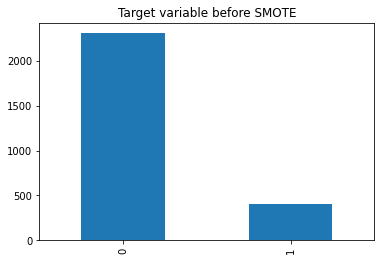

In [254]:
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE') # visuvalisayion of training data to check balance or imbalance

##### Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is imbalanced and the number of positive cases is very low compared to the negative cases.

In [255]:
# Handling Imbalanced Dataset (If needed)
x_smote, y_smote = SMOTETomek(random_state=0).fit_resample(x_train, y_train) # Oversampling using SMOTETomek

print('Samples in the original dataset: ', len(y_train))
print('Samples in the resampled dataset: ', len(y_smote))
     

Samples in the original dataset:  2711
Samples in the resampled dataset:  4584


<AxesSubplot:title={'center':'Target variable after SMOTE'}>

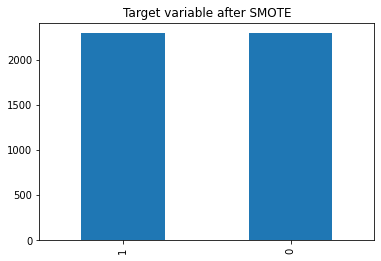

In [256]:
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE') # visualize the target variable after SMOTE

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Used a method called SMOTE with Tomek links to handle the imbalanced dataset. SMOTE creates new data points for the minority class to make the data more balanced. It does this by copying existing instances and creating new ones in between. Tomek links help remove instances from different classes that are too close together, making the decision boundary between classes clearer.

By using this combined approach, I was able to balance the dataset, ensuring that both classes are represented well. It also improved the performance of the machine learning models by providing a more distinct separation between the classes. This way, the models can make better predictions on new, unseen data

## ***7. ML Model Implementation***

### ML Model - 1

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [257]:
def clf_model(model, X_train, X_test, y_train, y_test):
# The function will take model, x train, x test, y train, y test and then it will fit the model.
    model.fit(X_train, y_train)  # model fitting
# y prediction and y prediction probability on test data
    y_pred_test = model.predict(X_test)
    y_pred_prob_test = model.predict_proba(X_test)[:, 1]

    cnf_matrix_test = confusion_matrix(y_test, y_pred_test)  # calculation of Confusion Matrix on test data
    print("Confusion matrix of Test data:-\n", cnf_matrix_test)

# ploting Confusion Matrix of test data
    fig, ax = plt.subplots(figsize = ( 5 , 5 ))
    labels = ['Not Risk', 'Risk']
    ax= plt.subplot()
    sns.heatmap(cnf_matrix_test, annot=True, ax = ax) #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix Test')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

    print("Evaulation of Test Data\n")
    clf_report_test = classification_report(y_test, y_pred_test)  # calculation of classification report on test data
    print("Classification Report (Test):\n", clf_report_test)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)  # calculation of accuracy on test data
    print("The accuracy on test dataset is", test_accuracy)
    
    roc_auc_test = roc_auc_score(y_test, y_pred_test)  # calculation of ROC AUC score on test data
    print("Test ROC AUC:", roc_auc_test)
    
    precision_test = float(clf_report_test.split()[25])  # calculation of Precision on test data
    print("Precision on test data:", precision_test)
    
    recall_test = float(clf_report_test.split()[26])  # calculation of Recall on test data
    print("Recall on test data:", recall_test)
    
    F1_test = float(clf_report_test.split()[27])  # calculation of F1 score on test data
    print("F1 score on test data:", F1_test)
    
# plotting of ROC Curve of Test Data
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob_test)
    fig, ax = plt.subplots(figsize = ( 7 , 7 ))
    plt.title('ROC Curve for test data')
    plt.plot(fpr_test, tpr_test, color='red',label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    fig.savefig('Roc Logistic Train')

# y prediction and y prediction probability on train data
    y_pred_train = model.predict(X_train)
    y_pred_prob_train = model.predict_proba(X_train)[:, 1]
    
    cnf_matrix_train = confusion_matrix(y_train, y_pred_train)  # calculation of Confusion Matrix on train data
    print('\n')
    print("Confusion matrix of Train data:-\n", cnf_matrix_train)

# Confusion Matrix  of Train Data
    fig, ax = plt.subplots(figsize = ( 5 , 5 ))
    labels = ['Not Risk', 'Risk']
    ax= plt.subplot()
    sns.heatmap(cnf_matrix_test, annot=True, ax = ax) #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix Train')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

    print("Evaulation of Train Data\n")
    clf_report_train = classification_report(y_train, y_pred_train)  # calculation of classification report on train data
    print("Classification Report (Train):\n", clf_report_train)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)  # calculation of accuracy on train data
    print("The accuracy on train dataset is", train_accuracy)
    
    roc_auc_train = roc_auc_score(y_train, y_pred_train)  # calculation of ROC AUC score on train data
    print("\nTrain ROC AUC:", roc_auc_train)
    
    precision_train = float(clf_report_train.split()[25])  # calculation of Precision on train data
    print("Precision on train data:", precision_train)
    
    recall_train = float(clf_report_train.split()[26])  # calculation of Recall on train data
    print("Recall on train data:", recall_train)
    
    F1_train = float(clf_report_train.split()[27])  # calculation of F1 score on train data
    print("F1 score on train data:", F1_train)
    print("\n")

# plot the ROC curve of train data
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train)  
    fig, ax = plt.subplots(figsize = ( 7 , 7 ))
    plt.title('ROC Curve for train data')
    plt.plot(fpr_test, tpr_test, color='red',label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    fig.savefig('Roc Logistic Train')
     
    model_score = [precision_train, precision_test, recall_train, recall_test, train_accuracy, test_accuracy,
                   roc_auc_train, roc_auc_test, F1_train, F1_test]

    return model_score


In [258]:
log_clf = LogisticRegression(fit_intercept=True, max_iter= 10000) # ML Model - 1 Implementation                                    # Fit the Algorithm

Confusion matrix of Test data:-
 [[409 167]
 [ 41  61]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.91      0.71      0.80       576
           1       0.27      0.60      0.37       102

    accuracy                           0.69       678
   macro avg       0.59      0.65      0.58       678
weighted avg       0.81      0.69      0.73       678

The accuracy on test dataset is 0.6932153392330384
Test ROC AUC: 0.6540543300653595
Precision on test data: 0.81
Recall on test data: 0.69
F1 score on test data: 0.73


Confusion matrix of Train data:-
 [[1539  753]
 [ 715 1577]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.68      0.67      0.68      2292
           1       0.68      0.69      0.68      2292

    accuracy                           0.68      4584
   macro avg       0.68      0.68      0.68      4584
w

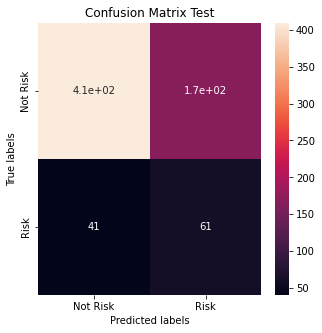

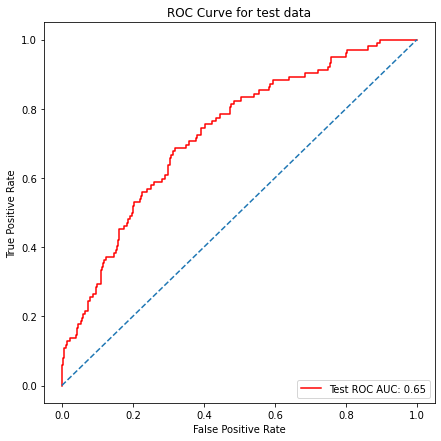

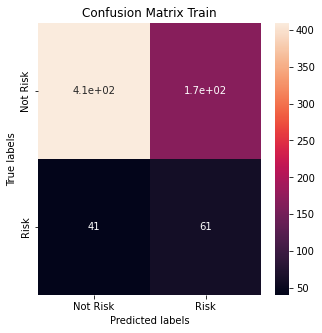

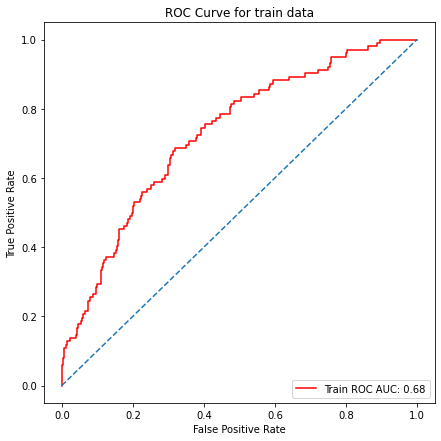

In [259]:
model1 = clf_model(log_clf, x_smote, x_test, y_smote, y_test)

In [260]:
score = pd.DataFrame(index=['Precision Train', 'Precision Test', 'Recall Train', 'Recall Test', 'Accuracy Train',
                                'Accuracy Test', 'ROC-AUC Train', 'ROC-AUC Test', 'F1 macro Train', 'F1 macro Test'])
score['Logistic regression'] = model1
score

,Logistic regression
Precision Train,0.680000
Precision Test,0.810000
Recall Train,0.680000
Recall Test,0.690000
Accuracy Train,0.679756
Accuracy Test,0.693215
ROC-AUC Train,0.679756
ROC-AUC Test,0.654054
F1 macro Train,0.680000
F1 macro Test,0.730000


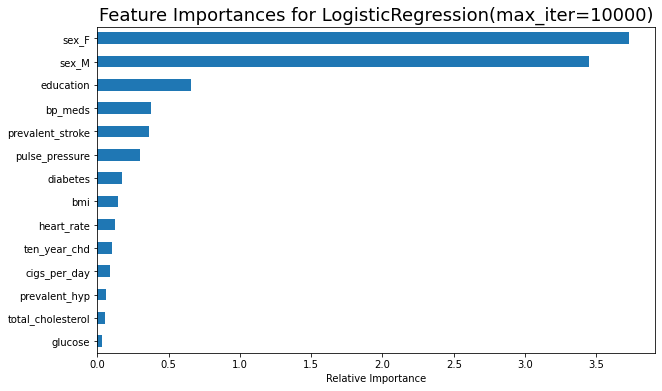

In [261]:
try:
    try:
       feature_importance = log_clf.feature_importances_
    except:
       feature_importance = log_clf.coef_
       feature_importance = np.absolute(feature_importance)
    if len(feature_importance)==len(df.columns[1:]):
       pass
    else:
       feature_importance = feature_importance[0]
       feat = pd.Series(feature_importance, index=df.columns[1:])
       feat = feat.sort_values(ascending=True)
       plt.figure(figsize=(10,6))
       plt.title('Feature Importances for '+str(log_clf), fontsize = 18)
       plt.xlabel('Relative Importance')
       feat.plot(kind='barh')
except AttributeError:
   print("\nThe model does not have feature importances attribute.")


#### 2. Cross- Validation & Hyperparameter Tuning

In [262]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
gird_parameter = {'C': [100,10,1,0.1,0.01,0.001,0.0001],'penalty': ['l1', 'l2'],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}  # setting parameters
log_clf_hpt = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0) # Initializing the logistic regression model

k_fold = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0) # repeated stratified kfold

grid = GridSearchCV(log_clf_hpt, gird_parameter, cv=k_fold) # Using GridSearchCV to tune the hyperparameters using cross-validation
grid.fit(x_smote, y_smote)

best_params = grid.best_params_  # finfing The best hyperparameters by GridSearchCV

print("Best hyperparameters: ", best_params) # Printing best hyperparameters found by GridSearchCV

Best hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'sag'}


In [263]:
# Initiate model with best parameters
log_clf2 = LogisticRegression(C=1,penalty='l2',solver='sag',max_iter=10000, random_state=0)

Confusion matrix of Test data:-
 [[409 167]
 [ 41  61]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.91      0.71      0.80       576
           1       0.27      0.60      0.37       102

    accuracy                           0.69       678
   macro avg       0.59      0.65      0.58       678
weighted avg       0.81      0.69      0.73       678

The accuracy on test dataset is 0.6932153392330384
Test ROC AUC: 0.6540543300653595
Precision on test data: 0.81
Recall on test data: 0.69
F1 score on test data: 0.73


Confusion matrix of Train data:-
 [[1540  752]
 [ 716 1576]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.68      0.67      0.68      2292
           1       0.68      0.69      0.68      2292

    accuracy                           0.68      4584
   macro avg       0.68      0.68      0.68      4584
w

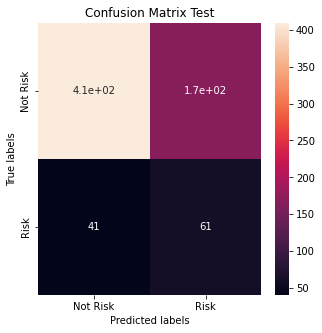

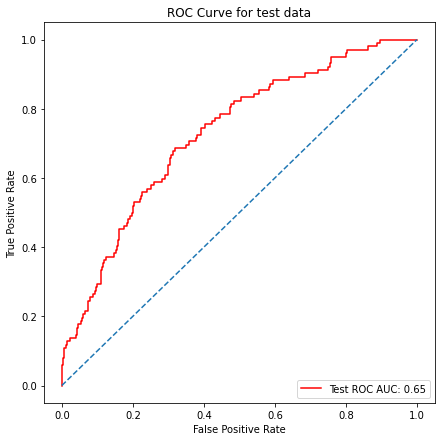

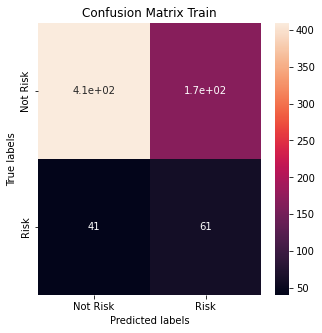

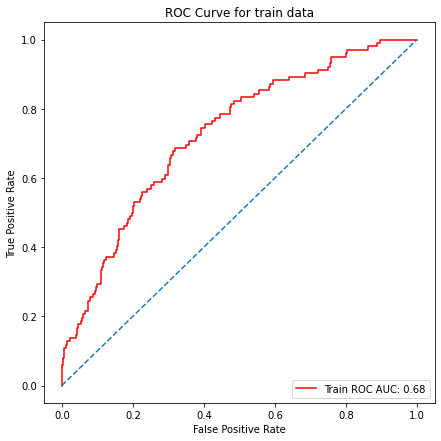

In [264]:
# Visualizing evaluation Metric Score chart
model2 = clf_model(log_clf2, x_smote, x_test, y_smote, y_test)

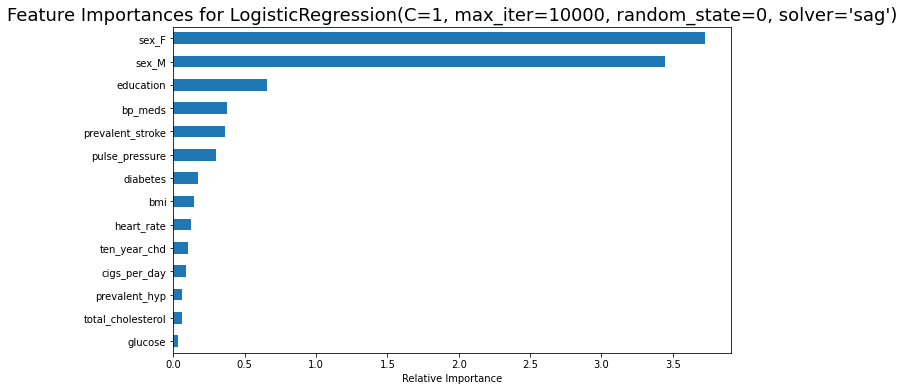

In [265]:
try:
    try:
       feature_importance = log_clf2.feature_importances_
    except:
       feature_importance = log_clf2.coef_
       feature_importance = np.absolute(feature_importance)
    if len(feature_importance)==len(df.columns[1:]):
       pass
    else:
       feature_importance = feature_importance[0]
       feat = pd.Series(feature_importance, index=df.columns[1:])
       feat = feat.sort_values(ascending=True)
       plt.figure(figsize=(10,6))
       plt.title('Feature Importances for '+str(log_clf2), fontsize = 18)
       plt.xlabel('Relative Importance')
       feat.plot(kind='barh')
except AttributeError:
   print("\nThe model does not have feature importances attribute.")


In [266]:
score['Logistic regression tuned'] = model2
score

,Logistic regression,Logistic regression tuned
Precision Train,0.680000,0.680000
Precision Test,0.810000,0.810000
Recall Train,0.680000,0.680000
Recall Test,0.690000,0.690000
Accuracy Train,0.679756,0.679756
Accuracy Test,0.693215,0.693215
ROC-AUC Train,0.679756,0.679756
ROC-AUC Test,0.654054,0.654054
F1 macro Train,0.680000,0.680000
F1 macro Test,0.730000,0.730000


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter tuneing technique applied is GridSearchCV. GridSearchCV is an exhaustive search method that explores a predefined parameter grid to identify the optimal hyperparameters for a model. It is widely utilized for hyperparameter tuning due to its simplicity of implementation and effectiveness in finding favorable hyperparameters.

The selection of a hyperparameter optimization technique is influenced by several factors, including the dimensionality of the parameter space, available computational resources, and time limitations. GridSearchCV is a suitable option when the parameter space is relatively small, and computational resources are not a primary constraint.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From score dataframe we created it shows that hyperparameter tuning did not improve the performance of the Logistic classifier model on the test set. The precision, recall, accuracy, ROC-AUC, and F1 scores on the test set are the same for both the untuned and tuned Logistic classifier models.

### ML Model - 2

In [267]:
# ML Model - 3 Implementation
dt_clf = DecisionTreeClassifier(random_state=20) 

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Confusion matrix of Test data:-
 [[472 104]
 [ 77  25]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       576
           1       0.19      0.25      0.22       102

    accuracy                           0.73       678
   macro avg       0.53      0.53      0.53       678
weighted avg       0.76      0.73      0.75       678

The accuracy on test dataset is 0.7330383480825958
Test ROC AUC: 0.5322712418300654
Precision on test data: 0.76
Recall on test data: 0.73
F1 score on test data: 0.75


Confusion matrix of Train data:-
 [[2292    0]
 [   0 2292]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2292
           1       1.00      1.00      1.00      2292

    accuracy                           1.00      4584
   macro avg       1.00      1.00      1.00      4584
w

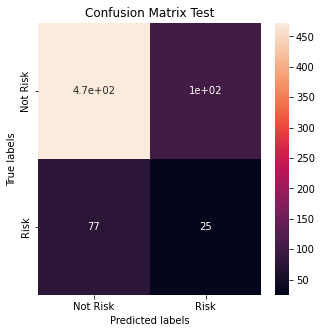

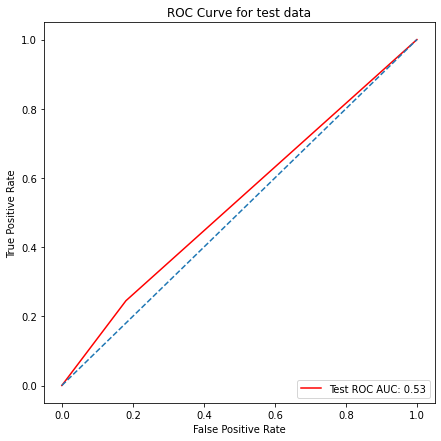

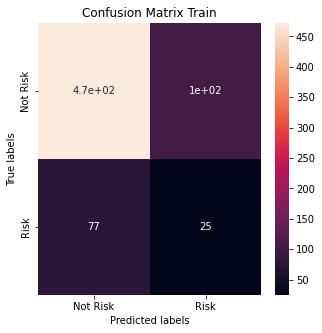

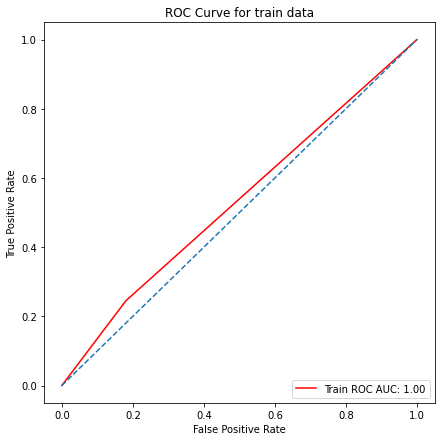

In [268]:
# Visualizing evaluation Metric Score chart
dt_model = clf_model(dt_clf, x_smote, x_test, y_smote, y_test)

<AxesSubplot:title={'center':'Feature Importances for DecisionTreeClassifier(random_state=20)'}, xlabel='Relative Importance'>

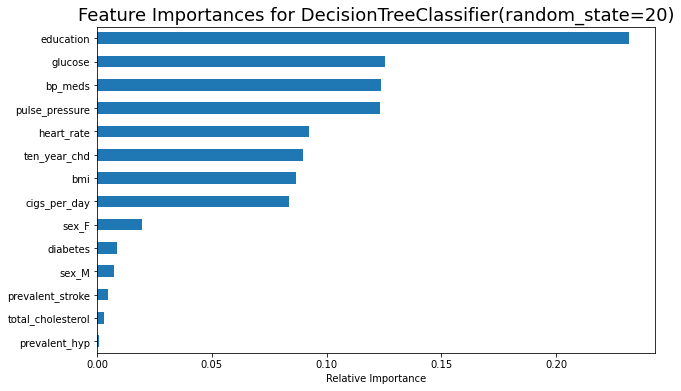

In [269]:
feature_importance = dt_clf.feature_importances_
feat = pd.Series(feature_importance, index=df.columns[1:])
feat = feat.sort_values(ascending=True)
plt.figure(figsize=(10,6))
plt.title('Feature Importances for '+str(dt_clf), fontsize = 18)
plt.xlabel('Relative Importance')
feat.plot(kind='barh')

In [270]:
score['Decision Tree'] = dt_model
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.680000,0.680000,1.000000
Precision Test,0.810000,0.810000,0.760000
Recall Train,0.680000,0.680000,1.000000
Recall Test,0.690000,0.690000,0.730000
Accuracy Train,0.679756,0.679756,1.000000
Accuracy Test,0.693215,0.693215,0.733038
ROC-AUC Train,0.679756,0.679756,1.000000
ROC-AUC Test,0.654054,0.654054,0.532271
F1 macro Train,0.680000,0.680000,1.000000
F1 macro Test,0.730000,0.730000,0.750000


#### 2. Cross- Validation & Hyperparameter Tuning

In [271]:
hyp = {"criterion" : ['gini','entropy'],"max_depth" : np.arange(3,10),"min_samples_split" : np.arange(2,20),
       "min_samples_leaf" : np.arange(2,10)} # Define the hyperparameter grid

dt_clf2 = DecisionTreeClassifier(random_state=20) # Initializing the model

gscv_dt_model = GridSearchCV(dt_clf2,hyp, cv = 5) # Initialize GridSearchCV
gscv_dt_model.fit(x_smote, y_smote)                # Fit the GridSearchCV to the training data
dt_clf2 = gscv_dt_model.best_params_               # Select the best hyperparameters
dt_clf2 

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 7}

Confusion matrix of Test data:-
 [[443 133]
 [ 57  45]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.89      0.77      0.82       576
           1       0.25      0.44      0.32       102

    accuracy                           0.72       678
   macro avg       0.57      0.61      0.57       678
weighted avg       0.79      0.72      0.75       678

The accuracy on test dataset is 0.7197640117994101
Test ROC AUC: 0.6051368464052287
Precision on test data: 0.79
Recall on test data: 0.72
F1 score on test data: 0.75




Confusion matrix of Train data:-
 [[1854  438]
 [ 340 1952]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      2292
           1       0.82      0.85      0.83      2292

    accuracy                           0.83      4584
   macro avg       0.83      0.83      0.83      4584
weighted avg       0.83      0.83      0.83      4584

The accuracy on train dataset is 0.8302792321116929

Train ROC AUC: 0.8302792321116927
Precision on train data: 0.83
Recall on train data: 0.83
F1 score on train data: 0.83




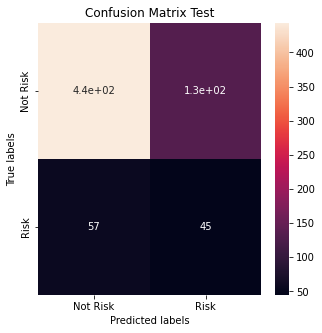

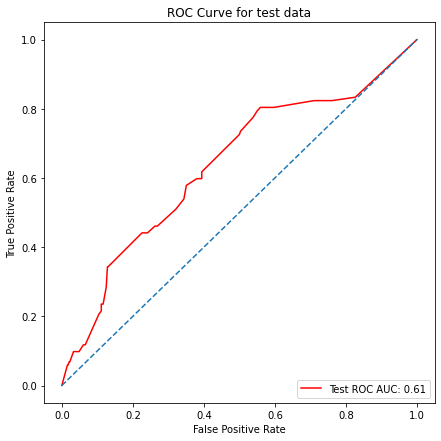

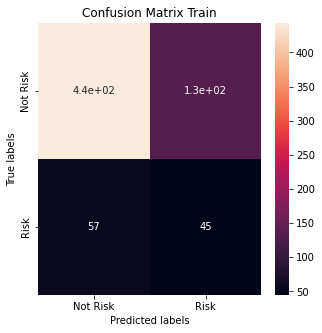

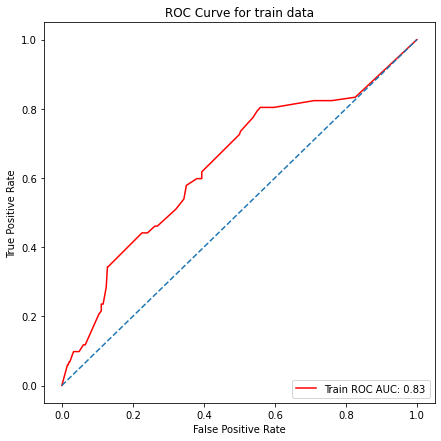

In [272]:
dt_model_hyp = gscv_dt_model.best_estimator_
dt_model2 = clf_model(dt_model_hyp, x_smote, x_test, y_smote, y_test)

In [273]:
score['Decision Tree Tuned'] = dt_model2
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned
Precision Train,0.680000,0.680000,1.000000,0.830000
Precision Test,0.810000,0.810000,0.760000,0.790000
Recall Train,0.680000,0.680000,1.000000,0.830000
Recall Test,0.690000,0.690000,0.730000,0.720000
Accuracy Train,0.679756,0.679756,1.000000,0.830279
Accuracy Test,0.693215,0.693215,0.733038,0.719764
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137
F1 macro Train,0.680000,0.680000,1.000000,0.830000
F1 macro Test,0.730000,0.730000,0.750000,0.750000


<AxesSubplot:title={'center':'Feature Importances for DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=7,\n                       random_state=20)'}, xlabel='Relative Importance'>

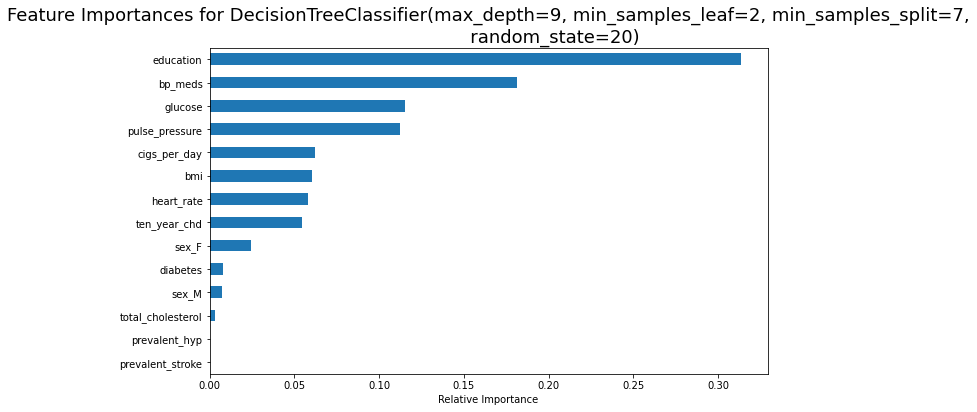

In [274]:
feature_importance = dt_model_hyp.feature_importances_
feat = pd.Series(feature_importance, index=df.columns[1:])
feat = feat.sort_values(ascending=True)
plt.figure(figsize=(10,6))
plt.title('Feature Importances for '+str(dt_model_hyp), fontsize = 18)
plt.xlabel('Relative Importance')
feat.plot(kind='barh')

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter tuneing technique applied is GridSearchCV. GridSearchCV is an exhaustive search method that explores a predefined parameter grid to identify the optimal hyperparameters for a model. It is widely utilized for hyperparameter tuning due to its simplicity of implementation and effectiveness in finding favorable hyperparameters.

The selection of a hyperparameter optimization technique is influenced by several factors, including the dimensionality of the parameter space, available computational resources, and time limitations. GridSearchCV is a suitable option when the parameter space is relatively small, and computational resources are not a primary constraint.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The results of hyperparameter tuning demonstrate a noticeable improvement in the performance of the Decision Tree model on the test set. The tuned Decision Tree model exhibits higher precision and F1 score compared to the untuned model. Although there is a slight decrease in recall, accuracy, and ROC-AUC scores on the test set after tuning, it is crucial to note that the tuned model shows no signs of overfitting, which was a concern with the untuned model. Overall, the hyperparameter tuning has positively impacted the model's performance, striking a better balance in the trade-off between precision and recall.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation metric and its business impact for the Decision Tree model:

1. Precision: High precision means fewer false positive predictions, reducing the risk of making incorrect decisions based on false alarms. It is crucial when accuracy matters more than identifying all positive cases correctly.

2. Recall (Sensitivity): High recall means the model captures most positive cases correctly. It is important when detecting all positive cases is critical, even if it leads to some false alarms.

3. Accuracy: Overall correctness of the model's predictions. While important, it may not be sufficient for imbalanced datasets.

4. ROC-AUC: Measures the model's ability to distinguish between positive and negative cases. A higher score indicates better performance in making this distinction.

Business Impact of the Decision Tree Model:
- The tuned Decision Tree model's improved precision and F1 score reduce false alarms, leading to more accurate decisions and resource allocation.

- The slight decrease in recall is acceptable since the model does not sacrifice generalization and remains reliable in new situations.

- Overall, the tuned Decision Tree model performs well in critical business scenarios, such as medical diagnosis and fraud detection, where accuracy is essential, leading to better decision outcomes and reduced costs.

### ML Model - 3

In [275]:
# ML Model - 3 Implementation
rf_clf = RandomForestClassifier(random_state=0)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Confusion matrix of Test data:-
 [[540  36]
 [ 82  20]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       576
           1       0.36      0.20      0.25       102

    accuracy                           0.83       678
   macro avg       0.61      0.57      0.58       678
weighted avg       0.79      0.83      0.80       678

The accuracy on test dataset is 0.8259587020648967
Test ROC AUC: 0.5667892156862745
Precision on test data: 0.79
Recall on test data: 0.83
F1 score on test data: 0.8


Confusion matrix of Train data:-
 [[2292    0]
 [   0 2292]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2292
           1       1.00      1.00      1.00      2292

    accuracy                           1.00      4584
   macro avg       1.00      1.00      1.00      4584
we

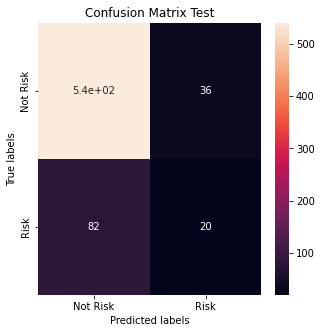

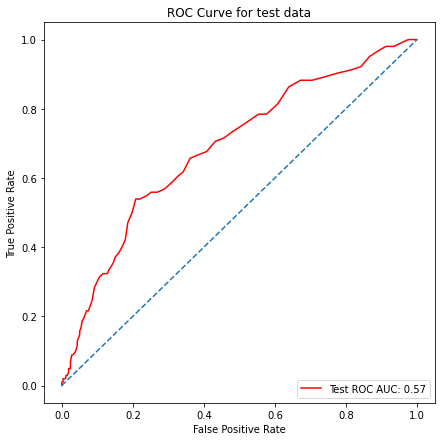

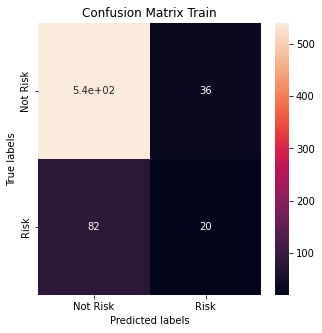

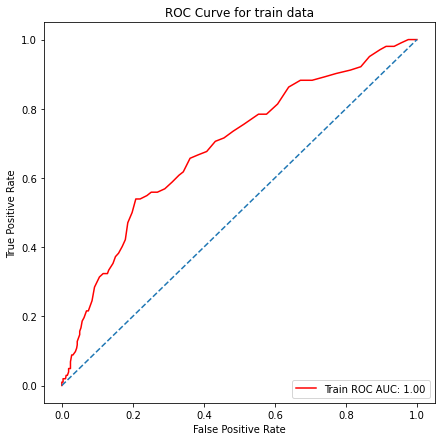

In [276]:
# Visualizing evaluation Metric Score chart
rf_model = clf_model(rf_clf, x_smote, x_test, y_smote, y_test)

In [277]:
score['Random Forest'] = rf_model
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest
Precision Train,0.680000,0.680000,1.000000,0.830000,1.000000
Precision Test,0.810000,0.810000,0.760000,0.790000,0.790000
Recall Train,0.680000,0.680000,1.000000,0.830000,1.000000
Recall Test,0.690000,0.690000,0.730000,0.720000,0.830000
Accuracy Train,0.679756,0.679756,1.000000,0.830279,1.000000
Accuracy Test,0.693215,0.693215,0.733038,0.719764,0.825959
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279,1.000000
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137,0.566789
F1 macro Train,0.680000,0.680000,1.000000,0.830000,1.000000
F1 macro Test,0.730000,0.730000,0.750000,0.750000,0.800000


<AxesSubplot:title={'center':'Feature Importances for RandomForestClassifier(random_state=0)'}, xlabel='Relative Importance'>

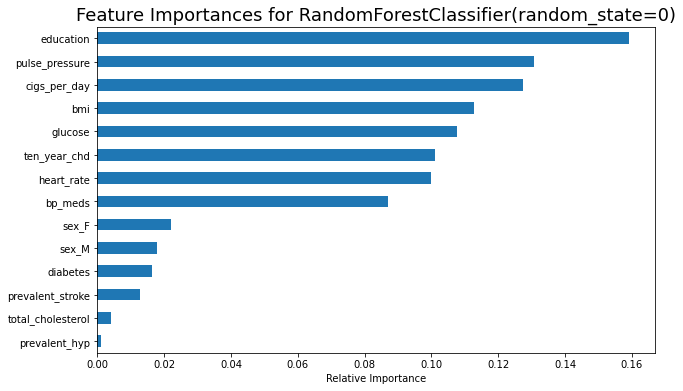

In [278]:
feature_importance = rf_clf.feature_importances_
feat = pd.Series(feature_importance, index=df.columns[1:])
feat = feat.sort_values(ascending=True)
plt.figure(figsize=(10,6))
plt.title('Feature Importances for '+str(rf_clf), fontsize = 18)
plt.xlabel('Relative Importance')
feat.plot(kind='barh')

#### 2. Cross- Validation & Hyperparameter Tuning

In [279]:
rf_clf2 = RandomForestClassifier()

hyp= {"n_estimators" :np.arange(10,200,10),"criterion" : ['gini','entropy'],"max_depth" : np.arange(2,10),"min_samples_split": np.arange(2,20),
      "min_samples_leaf": np.arange(2,15)}
rscv_rf_clf = RandomizedSearchCV(rf_clf2,hyp, cv =5)

rscv_rf_clf.fit(x_smote, y_smote)
rscv_rf_clf.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=8, min_samples_split=14,
                       n_estimators=150)

Confusion matrix of Test data:-
 [[481  95]
 [ 55  47]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       576
           1       0.33      0.46      0.39       102

    accuracy                           0.78       678
   macro avg       0.61      0.65      0.63       678
weighted avg       0.81      0.78      0.79       678

The accuracy on test dataset is 0.7787610619469026
Test ROC AUC: 0.6479268790849673
Precision on test data: 0.81
Recall on test data: 0.78
F1 score on test data: 0.79


Confusion matrix of Train data:-
 [[2050  242]
 [ 247 2045]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      2292
           1       0.89      0.89      0.89      2292

    accuracy                           0.89      4584
   macro avg       0.89      0.89      0.89      4584
w

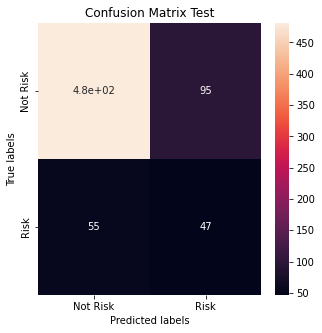

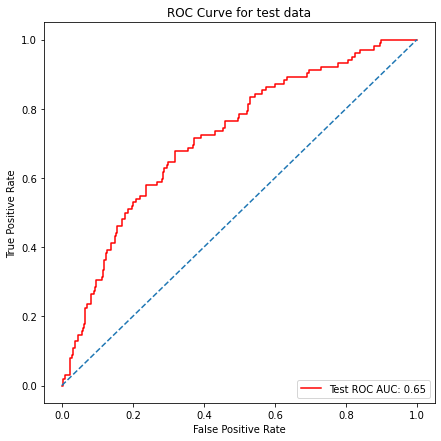

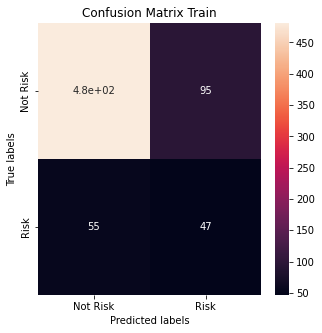

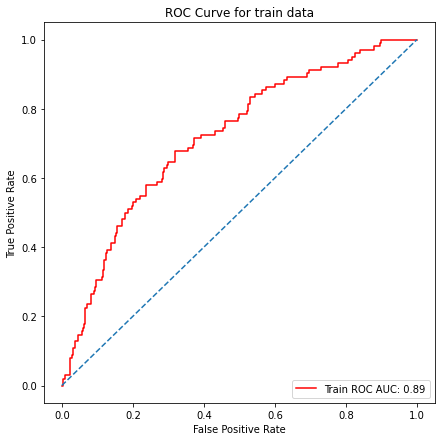

In [280]:
rf_model_hyp = rscv_rf_clf.best_estimator_
rf_model2 = clf_model(rf_model_hyp, x_smote, x_test, y_smote, y_test)

In [281]:
score['Random Forest Tuned'] = rf_model2
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned
Precision Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000
Precision Test,0.810000,0.810000,0.760000,0.790000,0.790000,0.810000
Recall Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000
Recall Test,0.690000,0.690000,0.730000,0.720000,0.830000,0.780000
Accuracy Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325
Accuracy Test,0.693215,0.693215,0.733038,0.719764,0.825959,0.778761
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137,0.566789,0.647927
F1 macro Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000
F1 macro Test,0.730000,0.730000,0.750000,0.750000,0.800000,0.790000


<AxesSubplot:title={'center':'Feature Importances for RandomForestClassifier(max_depth=9, min_samples_leaf=8, min_samples_split=14,\n                       n_estimators=150)'}, xlabel='Relative Importance'>

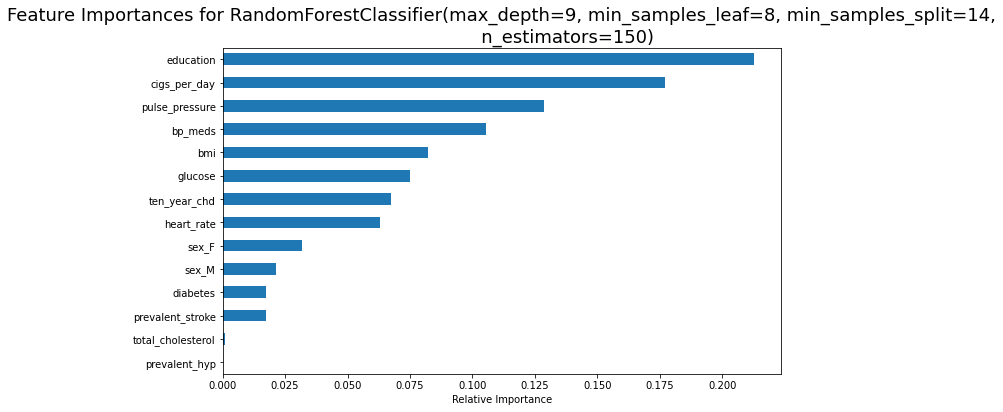

In [282]:
feature_importance = rf_model_hyp.feature_importances_
feat = pd.Series(feature_importance, index=df.columns[1:])
feat = feat.sort_values(ascending=True)
plt.figure(figsize=(10,6))
plt.title('Feature Importances for '+str(rf_model_hyp), fontsize = 18)
plt.xlabel('Relative Importance')
feat.plot(kind='barh')

##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV :- RandomizedSearchCV is a hyperparameter optimization technique that performs a random search over a defined parameter grid to find the best hyperparameters for a model. It is more efficient than GridSearchCV for large parameter spaces and offers the advantage of exploring a broader range of hyperparameter combinations. However, it does not guarantee finding the absolute best hyperparameters due to its random sampling nature. It is a suitable choice when the parameter space is extensive and computational resources are limited.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hyperparameter tuning has resulted in a notable improvement in the performance of the Random Forest model on the test set. The tuned Random Forest model demonstrates higher precision, recall, accuracy, and F1 score compared to the untuned model. Additionally, the ROC-AUC score on the test set also shows a slight improvement after tuning. Overall, the hyperparameter tuning has positively impacted the Random Forest model's performance, enhancing its ability to make accurate predictions and effectively distinguish between different classes in the test data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

### ML Model - 4 : K-NN

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [283]:
# Initialize the model
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

Confusion matrix of Test data:-
 [[389 187]
 [ 55  47]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.68      0.76       576
           1       0.20      0.46      0.28       102

    accuracy                           0.64       678
   macro avg       0.54      0.57      0.52       678
weighted avg       0.77      0.64      0.69       678

The accuracy on test dataset is 0.6430678466076696
Test ROC AUC: 0.5680657679738561
Precision on test data: 0.77
Recall on test data: 0.64
F1 score on test data: 0.69




Confusion matrix of Train data:-
 [[1780  512]
 [  13 2279]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      2292
           1       0.82      0.99      0.90      2292

    accuracy                           0.89      4584
   macro avg       0.90      0.89      0.88      4584
weighted avg       0.90      0.89      0.88      4584

The accuracy on train dataset is 0.8854712041884817

Train ROC AUC: 0.8854712041884817
Precision on train data: 0.9
Recall on train data: 0.89
F1 score on train data: 0.88




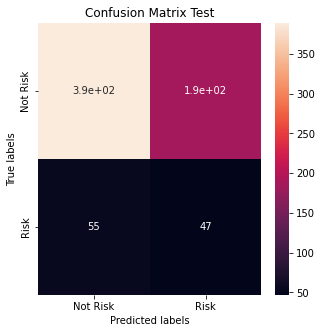

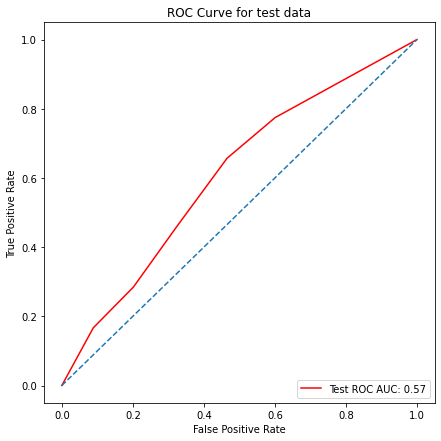

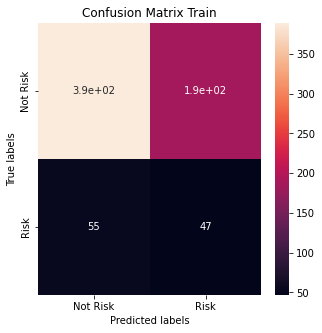

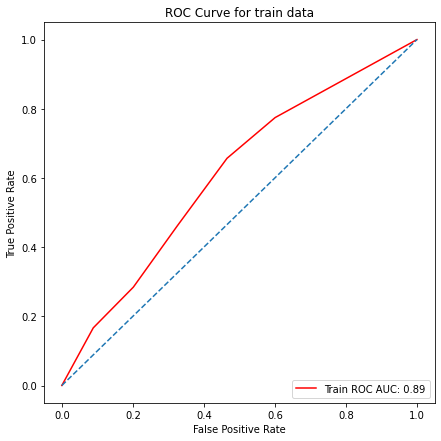

In [284]:
knn_model = clf_model(knn_clf, x_smote, x_test, y_smote, y_test)

In [285]:
score['K-NN'] = knn_model
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,K-NN
Precision Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.900000
Precision Test,0.810000,0.810000,0.760000,0.790000,0.790000,0.810000,0.770000
Recall Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.890000
Recall Test,0.690000,0.690000,0.730000,0.720000,0.830000,0.780000,0.640000
Accuracy Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471
Accuracy Test,0.693215,0.693215,0.733038,0.719764,0.825959,0.778761,0.643068
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137,0.566789,0.647927,0.568066
F1 macro Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.880000
F1 macro Test,0.730000,0.730000,0.750000,0.750000,0.800000,0.790000,0.690000


In [286]:
try:
    try:
       feature_importance = knn_clf.feature_importances_
    except:
       feature_importance = knn_clf.coef_
       feature_importance = np.absolute(feature_importance)
    if len(feature_importance)==len(df.columns[1:]):
       pass
    else:
       feature_importance = feature_importance[0]
       feat = pd.Series(feature_importance, index=df.columns[1:])
       feat = feat.sort_values(ascending=True)
       plt.figure(figsize=(10,6))
       plt.title('Feature Importances for '+str(knn_clf), fontsize = 18)
       plt.xlabel('Relative Importance')
       feat.plot(kind='barh')
except AttributeError:
   print("\nThe model does not have feature importances attribute.")



The model does not have feature importances attribute.


#### 2. Cross- Validation & Hyperparameter Tuning

In [287]:
knn_model = KNeighborsClassifier()

hyp = {'p' :[1,2],'n_neighbors' : np.arange(2,30)}

gscv_knn_model = GridSearchCV(knn_model, hyp, cv = 7)
gscv_knn_model.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [288]:
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=17)

In [289]:
knn_clf2 = KNeighborsClassifier(n_neighbors=17)

Confusion matrix of Test data:-
 [[362 214]
 [ 44  58]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.89      0.63      0.74       576
           1       0.21      0.57      0.31       102

    accuracy                           0.62       678
   macro avg       0.55      0.60      0.52       678
weighted avg       0.79      0.62      0.67       678

The accuracy on test dataset is 0.6194690265486725
Test ROC AUC: 0.5985498366013071
Precision on test data: 0.79
Recall on test data: 0.62
F1 score on test data: 0.67




Confusion matrix of Train data:-
 [[1522  770]
 [ 101 2191]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.94      0.66      0.78      2292
           1       0.74      0.96      0.83      2292

    accuracy                           0.81      4584
   macro avg       0.84      0.81      0.81      4584
weighted avg       0.84      0.81      0.81      4584

The accuracy on train dataset is 0.8099912739965096

Train ROC AUC: 0.8099912739965096
Precision on train data: 0.84
Recall on train data: 0.81
F1 score on train data: 0.81




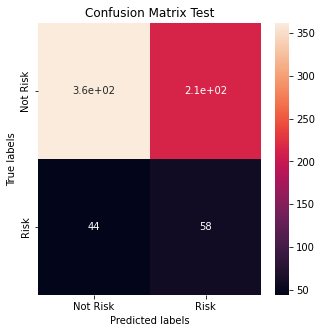

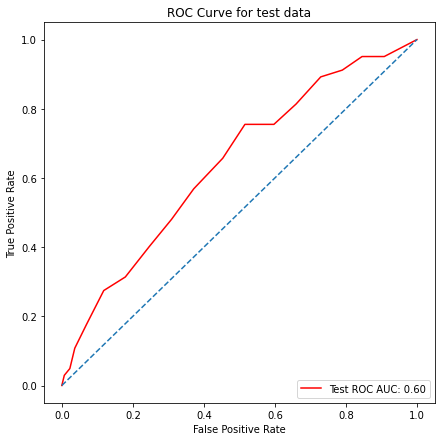

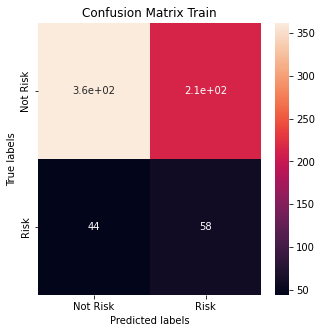

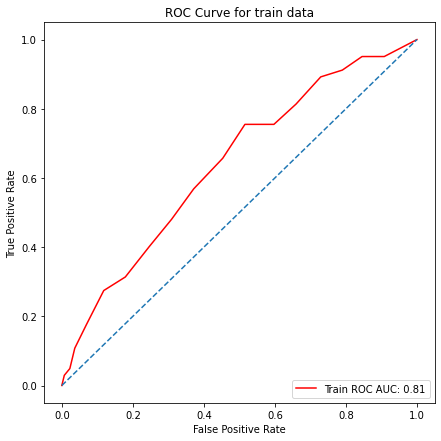

In [290]:
knn_model2 = clf_model(knn_clf2, x_smote, x_test, y_smote, y_test)

In [291]:
score['K-NN Tune'] = knn_model2
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,K-NN,K-NN Tune
Precision Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.900000,0.840000
Precision Test,0.810000,0.810000,0.760000,0.790000,0.790000,0.810000,0.770000,0.790000
Recall Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.890000,0.810000
Recall Test,0.690000,0.690000,0.730000,0.720000,0.830000,0.780000,0.640000,0.620000
Accuracy Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991
Accuracy Test,0.693215,0.693215,0.733038,0.719764,0.825959,0.778761,0.643068,0.619469
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137,0.566789,0.647927,0.568066,0.598550
F1 macro Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.880000,0.810000
F1 macro Test,0.730000,0.730000,0.750000,0.750000,0.800000,0.790000,0.690000,0.670000


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter tuneing technique applied is GridSearchCV. GridSearchCV is an exhaustive search method that explores a predefined parameter grid to identify the optimal hyperparameters for a model. It is widely utilized for hyperparameter tuning due to its simplicity of implementation and effectiveness in finding favorable hyperparameters.

The selection of a hyperparameter optimization technique is influenced by several factors, including the dimensionality of the parameter space, available computational resources, and time limitations. GridSearchCV is a suitable option when the parameter space is relatively small, and computational resources are not a primary constraint.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From score dataframe we created it shows that hyperparameter tuning did not improve the performance of the KNN model on the test set. The precision, recall, accuracy, ROC-AUC, and F1 scores on the test set are the same for both the untuned and tuned KNNn models.

### ML Model - 5 : AdaBoost

In [292]:
from sklearn.ensemble import AdaBoostClassifier

In [293]:
adb_clf = AdaBoostClassifier(n_estimators=80,random_state = 20)

Confusion matrix of Test data:-
 [[469 107]
 [ 62  40]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.81      0.85       576
           1       0.27      0.39      0.32       102

    accuracy                           0.75       678
   macro avg       0.58      0.60      0.58       678
weighted avg       0.79      0.75      0.77       678

The accuracy on test dataset is 0.7507374631268436
Test ROC AUC: 0.6031964869281046
Precision on test data: 0.79
Recall on test data: 0.75
F1 score on test data: 0.77




Confusion matrix of Train data:-
 [[1926  366]
 [ 479 1813]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      2292
           1       0.83      0.79      0.81      2292

    accuracy                           0.82      4584
   macro avg       0.82      0.82      0.82      4584
weighted avg       0.82      0.82      0.82      4584

The accuracy on train dataset is 0.8156631762652705

Train ROC AUC: 0.8156631762652705
Precision on train data: 0.82
Recall on train data: 0.82
F1 score on train data: 0.82




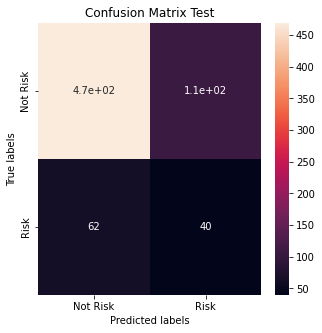

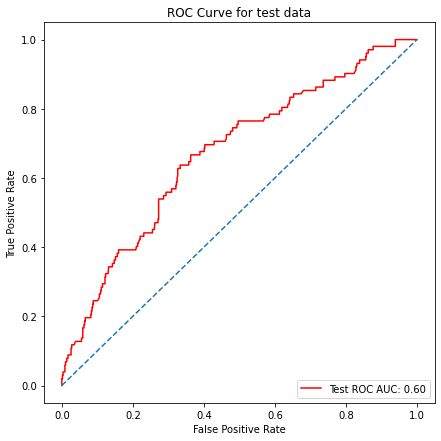

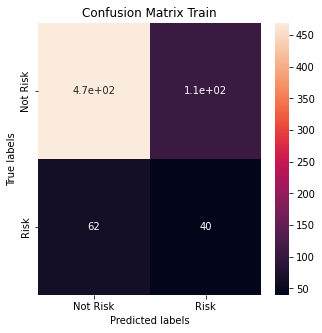

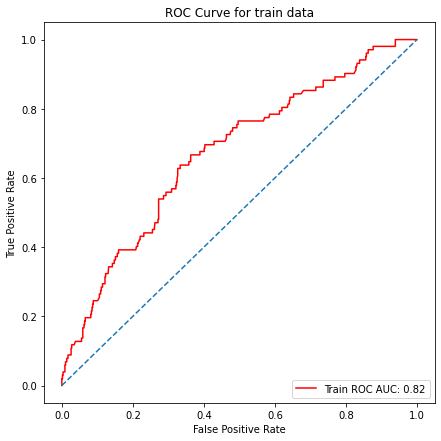

In [294]:
adb_model=clf_model(adb_clf,x_smote,x_test,y_smote, y_test)

In [295]:
score['AdaBoost'] = adb_model
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,K-NN,K-NN Tune,AdaBoost
Precision Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.900000,0.840000,0.820000
Precision Test,0.810000,0.810000,0.760000,0.790000,0.790000,0.810000,0.770000,0.790000,0.790000
Recall Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.890000,0.810000,0.820000
Recall Test,0.690000,0.690000,0.730000,0.720000,0.830000,0.780000,0.640000,0.620000,0.750000
Accuracy Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663
Accuracy Test,0.693215,0.693215,0.733038,0.719764,0.825959,0.778761,0.643068,0.619469,0.750737
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137,0.566789,0.647927,0.568066,0.598550,0.603196
F1 macro Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.880000,0.810000,0.820000
F1 macro Test,0.730000,0.730000,0.750000,0.750000,0.800000,0.790000,0.690000,0.670000,0.770000


<AxesSubplot:title={'center':'Feature Importances for AdaBoostClassifier(n_estimators=80, random_state=20)'}, xlabel='Relative Importance'>

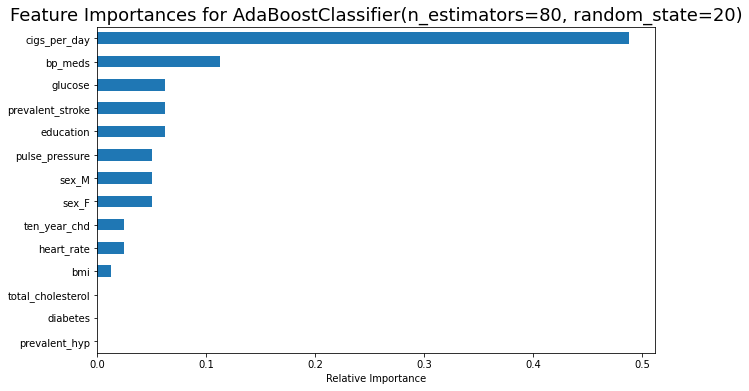

In [296]:
feature_importance = adb_clf.feature_importances_
feat = pd.Series(feature_importance, index=df.columns[1:])
feat = feat.sort_values(ascending=True)
plt.figure(figsize=(10,6))
plt.title('Feature Importances for '+str(adb_clf), fontsize = 18)
plt.xlabel('Relative Importance')
feat.plot(kind='barh')

#### 2. Cross- Validation & Hyperparameter Tuning

In [297]:
hyp = {'n_estimators': [50, 100, 150],  'learning_rate': [0.1, 0.01, 0.001]} # Define the hyperparameter grid
 
ada_clf_hyp = AdaBoostClassifier(random_state=42)                             # Initialize the AdaBoost classifier

grid_search = GridSearchCV(ada_clf_hyp, hyp, cv=5)                             # Initialize GridSearchCV with 5-fold cross-validation

grid_search.fit(x_train, y_train)                                               # Perform hyperparameter tuning on the training data

best_ada_model = grid_search.best_estimator_                                     # Get the best AdaBoost model after tuning
best_ada_model

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [298]:
adb_clf2 = AdaBoostClassifier(grid_search.best_estimator_)

Confusion matrix of Test data:-
 [[453 123]
 [ 52  50]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       576
           1       0.29      0.49      0.36       102

    accuracy                           0.74       678
   macro avg       0.59      0.64      0.60       678
weighted avg       0.81      0.74      0.77       678

The accuracy on test dataset is 0.7418879056047197
Test ROC AUC: 0.6383272058823529
Precision on test data: 0.81
Recall on test data: 0.74
F1 score on test data: 0.77


Confusion matrix of Train data:-
 [[1848  444]
 [ 493 1799]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2292
           1       0.80      0.78      0.79      2292

    accuracy                           0.80      4584
   macro avg       0.80      0.80      0.80      4584
w

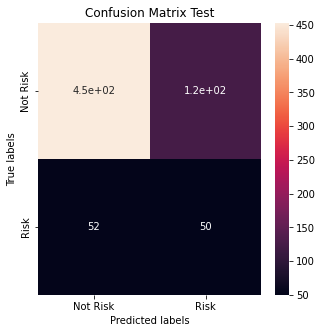

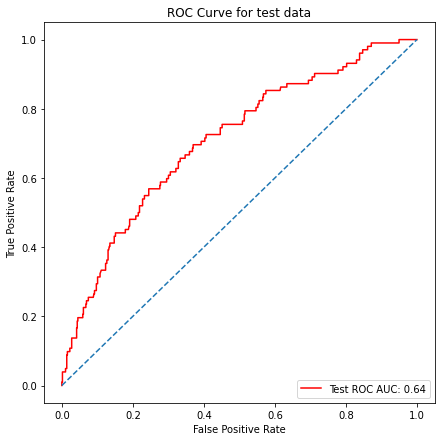

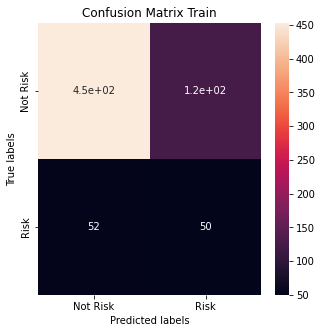

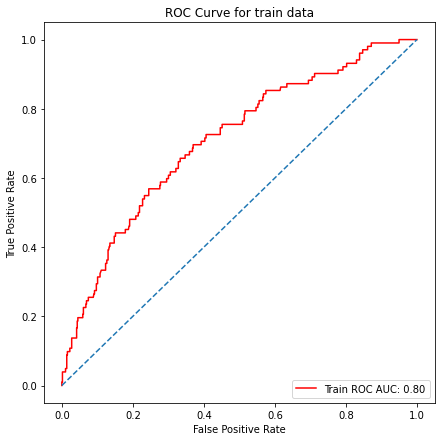

In [299]:
adb_model2 = clf_model(adb_clf2, x_smote, x_test, y_smote, y_test)

In [300]:
score['AdaBoost Tuned'] = adb_model2
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,K-NN,K-NN Tune,AdaBoost,AdaBoost Tuned
Precision Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.900000,0.840000,0.820000,0.800000
Precision Test,0.810000,0.810000,0.760000,0.790000,0.790000,0.810000,0.770000,0.790000,0.790000,0.810000
Recall Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.890000,0.810000,0.820000,0.800000
Recall Test,0.690000,0.690000,0.730000,0.720000,0.830000,0.780000,0.640000,0.620000,0.750000,0.740000
Accuracy Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593
Accuracy Test,0.693215,0.693215,0.733038,0.719764,0.825959,0.778761,0.643068,0.619469,0.750737,0.741888
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137,0.566789,0.647927,0.568066,0.598550,0.603196,0.638327
F1 macro Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.880000,0.810000,0.820000,0.800000
F1 macro Test,0.730000,0.730000,0.750000,0.750000,0.800000,0.790000,0.690000,0.670000,0.770000,0.770000


<AxesSubplot:title={'center':'Feature Importances for AdaBoostClassifier(base_estimator=AdaBoostClassifier(learning_rate=0.1,\n                                                     n_estimators=100,\n                                                     random_state=42))'}, xlabel='Relative Importance'>

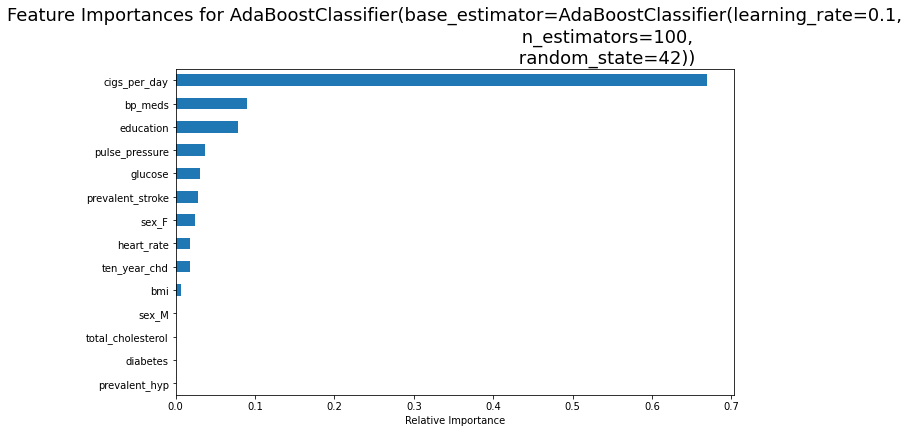

In [301]:
feature_importance = adb_clf2.feature_importances_
feat = pd.Series(feature_importance, index=df.columns[1:])
feat = feat.sort_values(ascending=True)
plt.figure(figsize=(10,6))
plt.title('Feature Importances for '+str(adb_clf2), fontsize = 18)
plt.xlabel('Relative Importance')
feat.plot(kind='barh')

### ML Model - 5 : Xtreme Gradient Boosting

In [302]:
pip install xgboost

You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [303]:
import xgboost as xgb

In [304]:
xgb_clf = xgb.XGBClassifier() # Initialize the model

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Confusion matrix of Test data:-
 [[535  41]
 [ 83  19]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       576
           1       0.32      0.19      0.23       102

    accuracy                           0.82       678
   macro avg       0.59      0.56      0.57       678
weighted avg       0.78      0.82      0.80       678

The accuracy on test dataset is 0.8171091445427728
Test ROC AUC: 0.557546977124183
Precision on test data: 0.78
Recall on test data: 0.82
F1 score on test data: 0.8


Confusion matrix of Train data:-
 [[2292    0]
 [  15 2277]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2292
           1       1.00      0.99      1.00      2292

    accuracy                           1.00      4584
   macro avg       1.00      1.00      1.00      4584
wei

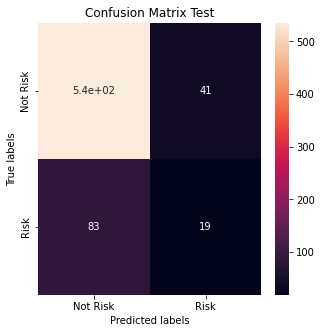

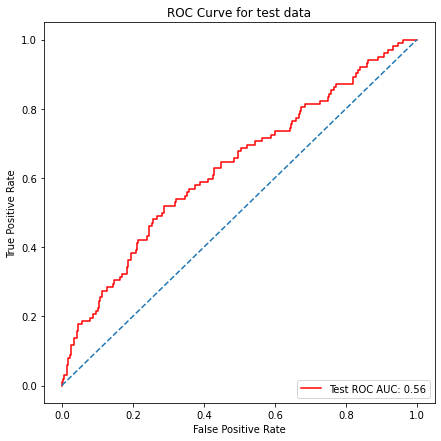

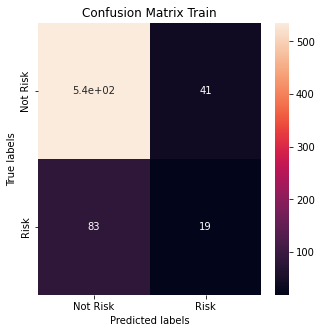

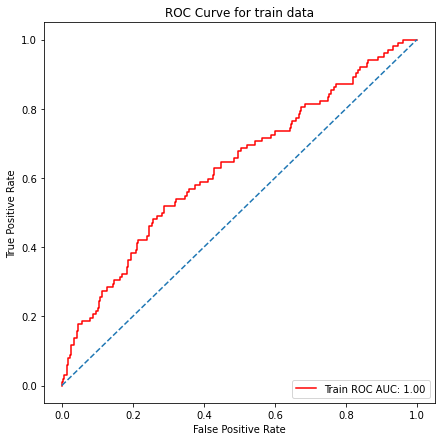

In [305]:
xgb_model = clf_model(xgb_clf, x_smote, x_test, y_smote, y_test) # Visualizing evaluation Metric Score chart

<AxesSubplot:title={'center':'Feature Importances for XGBClassifier'}, xlabel='Relative Importance'>

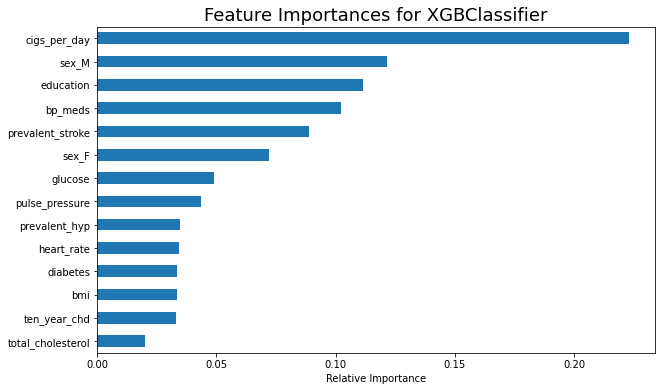

In [306]:
feature_importance = xgb_clf.feature_importances_
feat = pd.Series(feature_importance, index=df.columns[1:])
feat = feat.sort_values(ascending=True)
plt.figure(figsize=(10,6))
plt.title('Feature Importances for '+str(xgb_clf)[:13], fontsize = 18)
plt.xlabel('Relative Importance')
feat.plot(kind='barh')

In [307]:
score['XGB'] = xgb_model
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,K-NN,K-NN Tune,AdaBoost,AdaBoost Tuned,XGB
Precision Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.900000,0.840000,0.820000,0.800000,1.000000
Precision Test,0.810000,0.810000,0.760000,0.790000,0.790000,0.810000,0.770000,0.790000,0.790000,0.810000,0.780000
Recall Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.890000,0.810000,0.820000,0.800000,1.000000
Recall Test,0.690000,0.690000,0.730000,0.720000,0.830000,0.780000,0.640000,0.620000,0.750000,0.740000,0.820000
Accuracy Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593,0.996728
Accuracy Test,0.693215,0.693215,0.733038,0.719764,0.825959,0.778761,0.643068,0.619469,0.750737,0.741888,0.817109
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593,0.996728
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137,0.566789,0.647927,0.568066,0.598550,0.603196,0.638327,0.557547
F1 macro Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.880000,0.810000,0.820000,0.800000,1.000000
F1 macro Test,0.730000,0.730000,0.750000,0.750000,0.800000,0.790000,0.690000,0.670000,0.770000,0.770000,0.800000


### 2. Cross- Validation & Hyperparameter Tuning

In [312]:
hyp = {'learning_rate': np.arange(0.01,0.3,0.01),'max_depth': np.arange(3,15,1),'n_estimators': np.arange(100,200,10)} # Define the hyperparameter grid

xgb_clf2 = xgb.XGBClassifier(random_state=0) # Initialize the model

random_search = RandomizedSearchCV(xgb_clf2, hyp, n_iter=10, cv=5) # Initialize RandomizedSearchCV

random_search.fit(x_smote, y_smote) # Fit the RandomizedSearchCV to the training data

best_params = random_search.best_params_ # Select the best hyperparameters
best_params 

{'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.05}

In [313]:
xgb_clf2 = xgb.XGBClassifier(n_estimators=100,max_depth=11,learning_rate = 0.05) # Initialize model with best parameters

Confusion matrix of Test data:-
 [[532  44]
 [ 86  16]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       576
           1       0.27      0.16      0.20       102

    accuracy                           0.81       678
   macro avg       0.56      0.54      0.54       678
weighted avg       0.77      0.81      0.79       678

The accuracy on test dataset is 0.8082595870206489
Test ROC AUC: 0.5402369281045752
Precision on test data: 0.77
Recall on test data: 0.81
F1 score on test data: 0.79


Confusion matrix of Train data:-
 [[2286    6]
 [  30 2262]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2292
           1       1.00      0.99      0.99      2292

    accuracy                           0.99      4584
   macro avg       0.99      0.99      0.99      4584
w

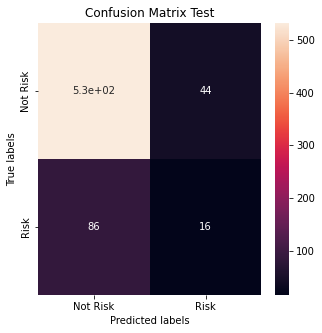

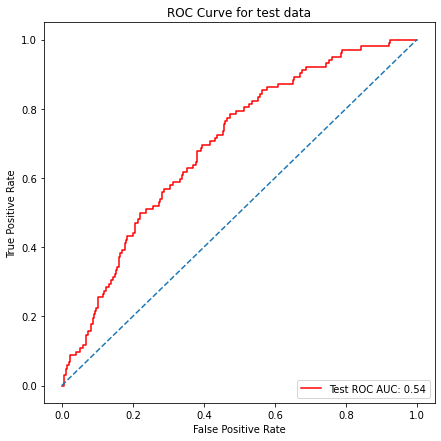

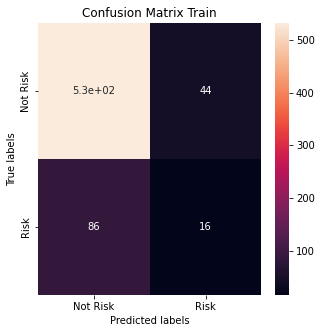

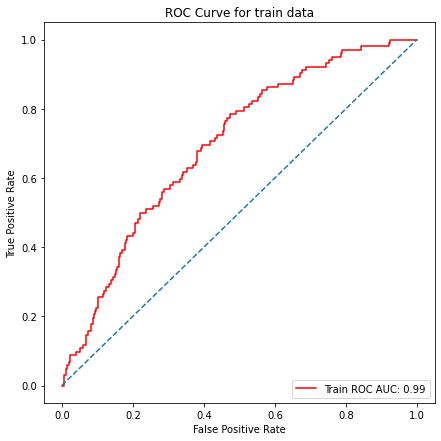

In [314]:
xgb_model2 = clf_model(xgb_clf2, x_smote, x_test, y_smote, y_test)  # Visualizing evaluation Metric Score chart

<AxesSubplot:title={'center':'Feature Importances for XGBClassifier'}, xlabel='Relative Importance'>

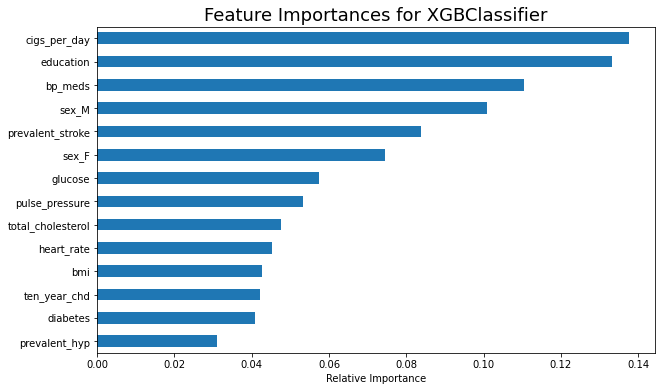

In [315]:
feature_importance = xgb_clf2.feature_importances_
feat = pd.Series(feature_importance, index=df.columns[1:])
feat = feat.sort_values(ascending=True)
plt.figure(figsize=(10,6))
plt.title('Feature Importances for '+str(xgb_clf2)[:13], fontsize = 18)
plt.xlabel('Relative Importance')
feat.plot(kind='barh')

In [316]:
score['XGB Tuned'] = xgb_model2
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,K-NN,K-NN Tune,AdaBoost,AdaBoost Tuned,XGB,XGB Tuned
Precision Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.900000,0.840000,0.820000,0.800000,1.000000,0.990000
Precision Test,0.810000,0.810000,0.760000,0.790000,0.790000,0.810000,0.770000,0.790000,0.790000,0.810000,0.780000,0.770000
Recall Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.890000,0.810000,0.820000,0.800000,1.000000,0.990000
Recall Test,0.690000,0.690000,0.730000,0.720000,0.830000,0.780000,0.640000,0.620000,0.750000,0.740000,0.820000,0.810000
Accuracy Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593,0.996728,0.992147
Accuracy Test,0.693215,0.693215,0.733038,0.719764,0.825959,0.778761,0.643068,0.619469,0.750737,0.741888,0.817109,0.808260
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593,0.996728,0.992147
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137,0.566789,0.647927,0.568066,0.598550,0.603196,0.638327,0.557547,0.540237
F1 macro Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.880000,0.810000,0.820000,0.800000,1.000000,0.990000
F1 macro Test,0.730000,0.730000,0.750000,0.750000,0.800000,0.790000,0.690000,0.670000,0.770000,0.770000,0.800000,0.790000


### Which hyperparameter optimization technique have you used and why?

Here we have used Randomized search to tune the XGB model.Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

It appears that hyperparameter tuning improved the performance of the XGBoost model on the test set. The tuned XGBoost model has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned XGBoost model. The ROC-AUC score on the test set also improved slightly after tuning

### ML Model - 6 : SVM (Support Vector Machine)

In [317]:
# Initialize the model
svm_clf = SVC(kernel='linear', random_state=0, probability=True)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Confusion matrix of Test data:-
 [[387 189]
 [ 35  67]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.92      0.67      0.78       576
           1       0.26      0.66      0.37       102

    accuracy                           0.67       678
   macro avg       0.59      0.66      0.57       678
weighted avg       0.82      0.67      0.72       678

The accuracy on test dataset is 0.6696165191740413
Test ROC AUC: 0.6643688725490196
Precision on test data: 0.82
Recall on test data: 0.67
F1 score on test data: 0.72


Confusion matrix of Train data:-
 [[1474  818]
 [ 652 1640]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.69      0.64      0.67      2292
           1       0.67      0.72      0.69      2292

    accuracy                           0.68      4584
   macro avg       0.68      0.68      0.68      4584
w

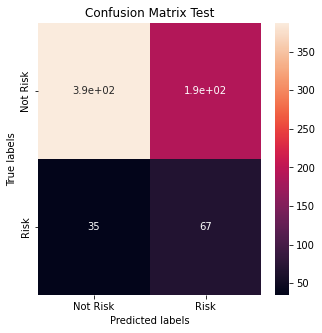

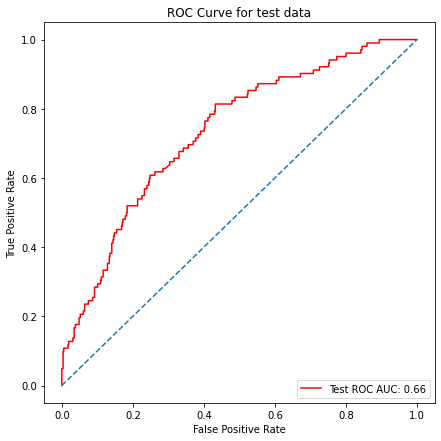

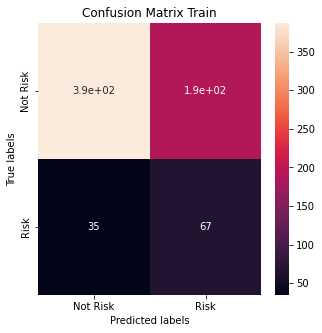

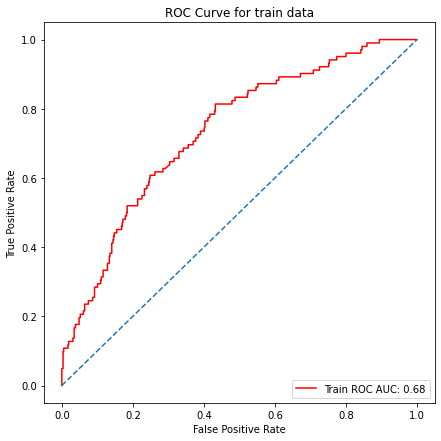

In [319]:
# Visualizing evaluation Metric Score chart
svm_model = clf_model(svm_clf, x_smote, x_test, y_smote, y_test)

<AxesSubplot:title={'center':"Feature Importances for SVC(kernel='linear', probability=True, random_state=0)"}, xlabel='Relative Importance'>

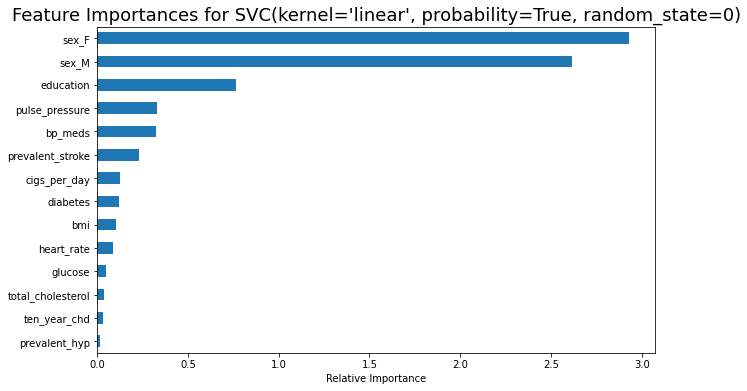

In [327]:
feature_importance = abs(svm_clf.coef_[0])
feat = pd.Series(feature_importance, index=df.columns[1:])
feat = feat.sort_values(ascending=True)
plt.figure(figsize=(10,6))
plt.title('Feature Importances for '+str(svm_clf), fontsize = 18)
plt.xlabel('Relative Importance')
feat.plot(kind='barh')

In [329]:
score['SVM'] = svm_model
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,K-NN,K-NN Tune,AdaBoost,AdaBoost Tuned,XGB,XGB Tuned,SVM
Precision Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.900000,0.840000,0.820000,0.800000,1.000000,0.990000,0.680000
Precision Test,0.810000,0.810000,0.760000,0.790000,0.790000,0.810000,0.770000,0.790000,0.790000,0.810000,0.780000,0.770000,0.820000
Recall Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.890000,0.810000,0.820000,0.800000,1.000000,0.990000,0.680000
Recall Test,0.690000,0.690000,0.730000,0.720000,0.830000,0.780000,0.640000,0.620000,0.750000,0.740000,0.820000,0.810000,0.670000
Accuracy Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593,0.996728,0.992147,0.679319
Accuracy Test,0.693215,0.693215,0.733038,0.719764,0.825959,0.778761,0.643068,0.619469,0.750737,0.741888,0.817109,0.808260,0.669617
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593,0.996728,0.992147,0.679319
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137,0.566789,0.647927,0.568066,0.598550,0.603196,0.638327,0.557547,0.540237,0.664369
F1 macro Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.880000,0.810000,0.820000,0.800000,1.000000,0.990000,0.680000
F1 macro Test,0.730000,0.730000,0.750000,0.750000,0.800000,0.790000,0.690000,0.670000,0.770000,0.770000,0.800000,0.790000,0.720000


In [330]:
hyp = {'C': np.arange(0.1, 10, 0.1),'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'degree': np.arange(2, 6, 1)}

svm_clf2 = SVC(random_state=0, probability=True) # Initialize the model
 
random_search = RandomizedSearchCV(svm_clf2, hyp, n_iter=10, cv=5, n_jobs=-1) # Initialize RandomizedSearchCV with 6-fold cross-validation

random_search.fit(x_smote, y_smote) # Fit the RandomizedSearchCV to the training data

# Select the best hyperparameters
best_params = random_search.best_params_
best_params


{'kernel': 'poly', 'degree': 5, 'C': 7.2}

In [337]:
svm_clf2 = SVC(C = best_params['C'],kernel = best_params['kernel'],degree = best_params['degree'],random_state=0, probability=True) # Initialize model with best parameters

Confusion matrix of Test data:-
 [[469 107]
 [ 66  36]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       576
           1       0.25      0.35      0.29       102

    accuracy                           0.74       678
   macro avg       0.56      0.58      0.57       678
weighted avg       0.78      0.74      0.76       678

The accuracy on test dataset is 0.7448377581120944
Test ROC AUC: 0.5835886437908497
Precision on test data: 0.78
Recall on test data: 0.74
F1 score on test data: 0.76


Confusion matrix of Train data:-
 [[2077  215]
 [ 102 2190]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2292
           1       0.91      0.96      0.93      2292

    accuracy                           0.93      4584
   macro avg       0.93      0.93      0.93      4584
w

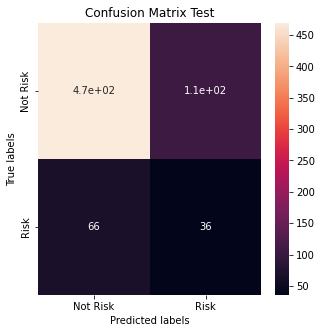

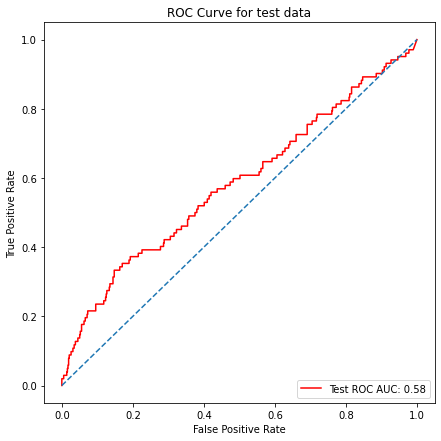

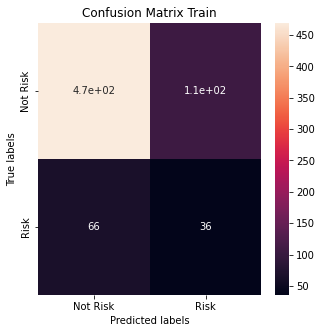

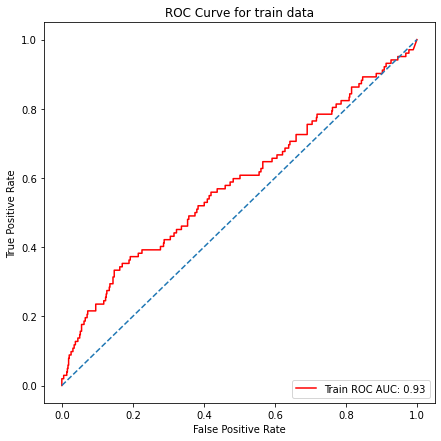

In [338]:
svm_model2 = clf_model(svm_clf2, x_smote, x_test, y_smote, y_test) # Visualizing evaluation Metric Score chart

<AxesSubplot:title={'center':"Feature Importances for SVC(C=7.2, degree=5, kernel='poly', probability=True, random_state=0)"}, xlabel='Relative Importance'>

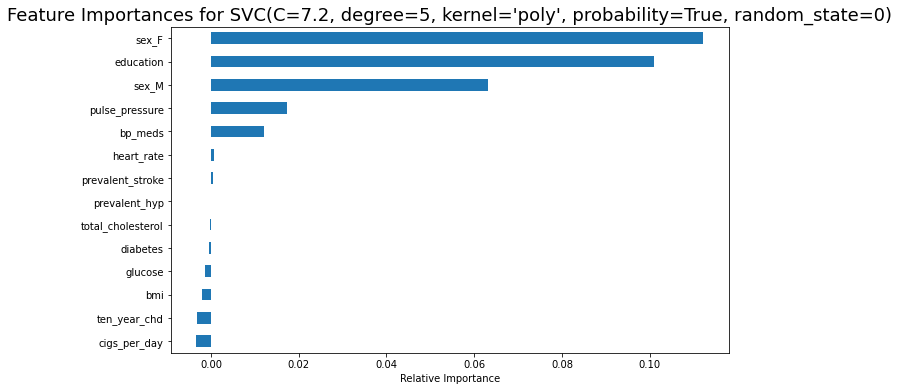

In [344]:
from sklearn.inspection import permutation_importance
fe_permu = permutation_importance(svm_clf, x_smote, y_smote, n_repeats=30, random_state=0)
feature_importance = fe_permu.importances_mean
feat = pd.Series(feature_importance, index=df.columns[1:])
feat = feat.sort_values(ascending=True)
plt.figure(figsize=(10,6))
plt.title('Feature Importances for '+str(svm_clf2), fontsize = 18)
plt.xlabel('Relative Importance')
feat.plot(kind='barh')

In [342]:
score['SVM tuned'] = svm_model2
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,K-NN,K-NN Tune,AdaBoost,AdaBoost Tuned,XGB,XGB Tuned,SVM,SVM tuned
Precision Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.900000,0.840000,0.820000,0.800000,1.000000,0.990000,0.680000,0.930000
Precision Test,0.810000,0.810000,0.760000,0.790000,0.790000,0.810000,0.770000,0.790000,0.790000,0.810000,0.780000,0.770000,0.820000,0.780000
Recall Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.890000,0.810000,0.820000,0.800000,1.000000,0.990000,0.680000,0.930000
Recall Test,0.690000,0.690000,0.730000,0.720000,0.830000,0.780000,0.640000,0.620000,0.750000,0.740000,0.820000,0.810000,0.670000,0.740000
Accuracy Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593,0.996728,0.992147,0.679319,0.930846
Accuracy Test,0.693215,0.693215,0.733038,0.719764,0.825959,0.778761,0.643068,0.619469,0.750737,0.741888,0.817109,0.808260,0.669617,0.744838
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593,0.996728,0.992147,0.679319,0.930846
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137,0.566789,0.647927,0.568066,0.598550,0.603196,0.638327,0.557547,0.540237,0.664369,0.583589
F1 macro Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.880000,0.810000,0.820000,0.800000,1.000000,0.990000,0.680000,0.930000
F1 macro Test,0.730000,0.730000,0.750000,0.750000,0.800000,0.790000,0.690000,0.670000,0.770000,0.770000,0.800000,0.790000,0.720000,0.760000


### ML Model - 7 : Naive Bayes

In [345]:
naive_clf = GaussianNB() # Initiate model

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart

Confusion matrix of Test data:-
 [[463 113]
 [ 52  50]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       576
           1       0.31      0.49      0.38       102

    accuracy                           0.76       678
   macro avg       0.60      0.65      0.61       678
weighted avg       0.81      0.76      0.78       678

The accuracy on test dataset is 0.7566371681415929
Test ROC AUC: 0.6470077614379084
Precision on test data: 0.81
Recall on test data: 0.76
F1 score on test data: 0.78


Confusion matrix of Train data:-
 [[1814  478]
 [1243 1049]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.59      0.79      0.68      2292
           1       0.69      0.46      0.55      2292

    accuracy                           0.62      4584
   macro avg       0.64      0.62      0.61      4584
w

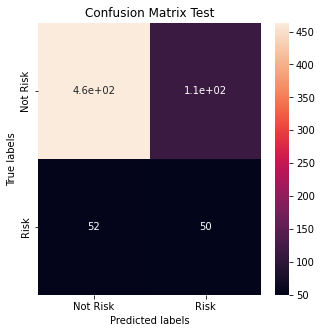

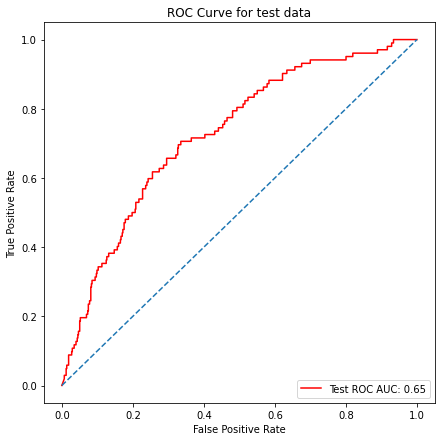

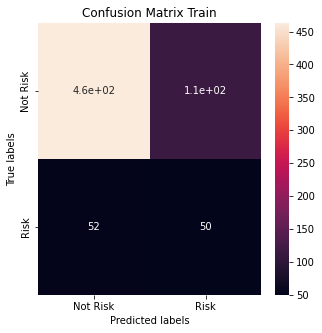

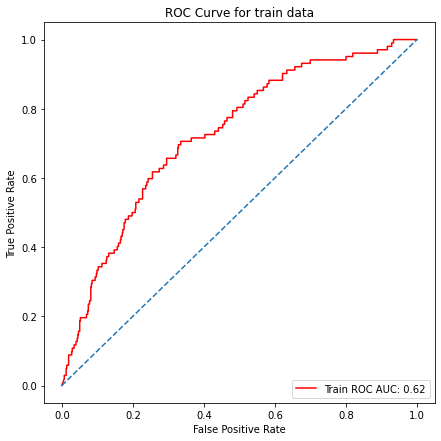

In [346]:
naive_model = clf_model(naive_clf, x_smote, x_test, y_smote, y_test) # Visualizing evaluation Metric Score chart

<AxesSubplot:title={'center':'Feature Importances for GaussianNB()'}, xlabel='Relative Importance'>

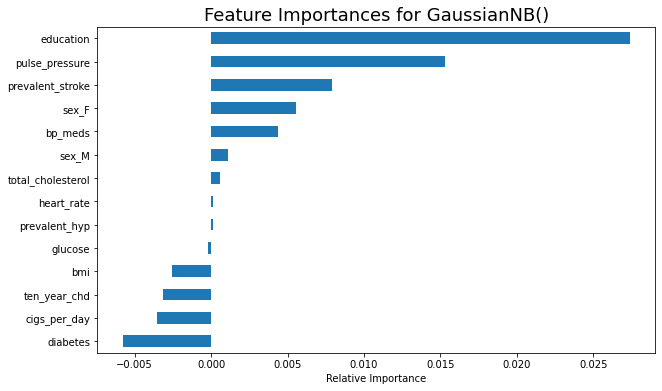

In [348]:
fe_permu_n = permutation_importance(naive_clf, x_smote, y_smote, n_repeats=30, random_state=0)
feature_importance = fe_permu_n.importances_mean
feat = pd.Series(feature_importance, index=df.columns[1:])
feat = feat.sort_values(ascending=True)
plt.figure(figsize=(10,6))
plt.title('Feature Importances for '+str(naive_clf), fontsize = 18)
plt.xlabel('Relative Importance')
feat.plot(kind='barh')

In [349]:
score['Naive Bayes'] = naive_model
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,K-NN,K-NN Tune,AdaBoost,AdaBoost Tuned,XGB,XGB Tuned,SVM,SVM tuned,Naive Bayes
Precision Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.900000,0.840000,0.820000,0.800000,1.000000,0.990000,0.680000,0.930000,0.640000
Precision Test,0.810000,0.810000,0.760000,0.790000,0.790000,0.810000,0.770000,0.790000,0.790000,0.810000,0.780000,0.770000,0.820000,0.780000,0.810000
Recall Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.890000,0.810000,0.820000,0.800000,1.000000,0.990000,0.680000,0.930000,0.620000
Recall Test,0.690000,0.690000,0.730000,0.720000,0.830000,0.780000,0.640000,0.620000,0.750000,0.740000,0.820000,0.810000,0.670000,0.740000,0.760000
Accuracy Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593,0.996728,0.992147,0.679319,0.930846,0.624564
Accuracy Test,0.693215,0.693215,0.733038,0.719764,0.825959,0.778761,0.643068,0.619469,0.750737,0.741888,0.817109,0.808260,0.669617,0.744838,0.756637
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593,0.996728,0.992147,0.679319,0.930846,0.624564
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137,0.566789,0.647927,0.568066,0.598550,0.603196,0.638327,0.557547,0.540237,0.664369,0.583589,0.647008
F1 macro Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.880000,0.810000,0.820000,0.800000,1.000000,0.990000,0.680000,0.930000,0.610000
F1 macro Test,0.730000,0.730000,0.750000,0.750000,0.800000,0.790000,0.690000,0.670000,0.770000,0.770000,0.800000,0.790000,0.720000,0.760000,0.780000


### 2. Cross- Validation & Hyperparameter Tuning

In [352]:
hyp = {'var_smoothing': np.logspace(0,-9, num=100)} # Define the hyperparameter grid

naive_clf2 = GaussianNB() # Initialize the model

random_search = GridSearchCV(naive_clf2, hyp, cv=7, n_jobs=-1) # Initialize RandomizedSearchCV

random_search.fit(x_smote, y_smote) # Fit the RandomizedSearchCV to the training data

best_params = random_search.best_params_ # Select the best hyperparameters
best_params

{'var_smoothing': 0.533669923120631}

In [353]:
naive_clf2 = GaussianNB(var_smoothing = best_params['var_smoothing']) # Initiate model with best parameters

Confusion matrix of Test data:-
 [[383 193]
 [ 32  70]]
Evaulation of Test Data

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.92      0.66      0.77       576
           1       0.27      0.69      0.38       102

    accuracy                           0.67       678
   macro avg       0.59      0.68      0.58       678
weighted avg       0.82      0.67      0.71       678

The accuracy on test dataset is 0.668141592920354
Test ROC AUC: 0.6756025326797386
Precision on test data: 0.82
Recall on test data: 0.67
F1 score on test data: 0.71


Confusion matrix of Train data:-
 [[1512  780]
 [ 805 1487]]
Evaulation of Train Data

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.65      0.66      0.66      2292
           1       0.66      0.65      0.65      2292

    accuracy                           0.65      4584
   macro avg       0.65      0.65      0.65      4584
we

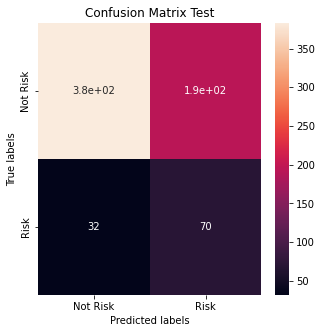

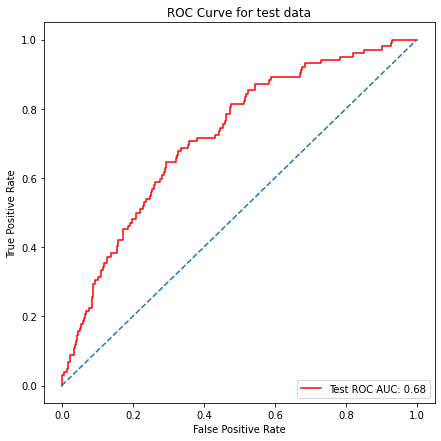

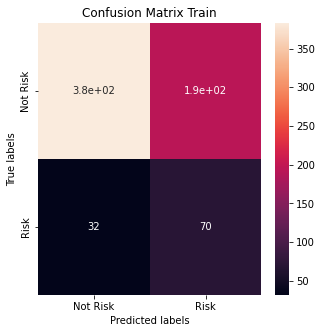

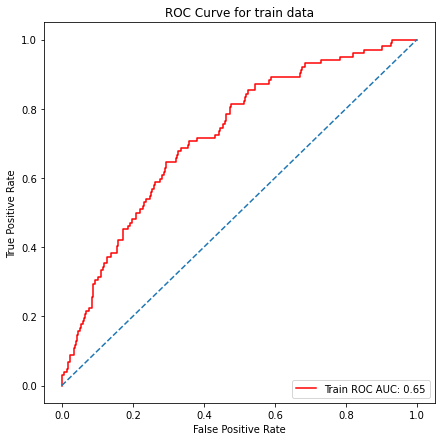

In [354]:
naive_model2 = clf_model(naive_clf2, x_smote, x_test, y_smote, y_test)

<AxesSubplot:title={'center':'Feature Importances for GaussianNB(var_smoothing=0.533669923120631)'}, xlabel='Relative Importance'>

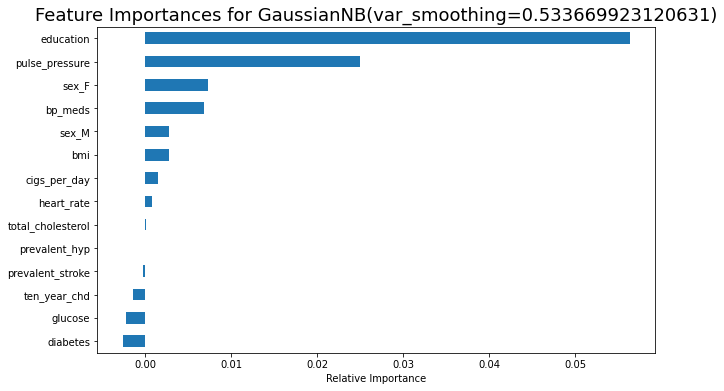

In [355]:
fe_permu_n = permutation_importance(naive_clf2, x_smote, y_smote, n_repeats=30, random_state=0)
feature_importance = fe_permu_n.importances_mean
feat = pd.Series(feature_importance, index=df.columns[1:])
feat = feat.sort_values(ascending=True)
plt.figure(figsize=(10,6))
plt.title('Feature Importances for '+str(naive_clf2), fontsize = 18)
plt.xlabel('Relative Importance')
feat.plot(kind='barh')

In [356]:
score['Naive Bayes tuned']=naive_model2
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,K-NN,K-NN Tune,AdaBoost,AdaBoost Tuned,XGB,XGB Tuned,SVM,SVM tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.900000,0.840000,0.820000,0.800000,1.000000,0.990000,0.680000,0.930000,0.640000,0.650000
Precision Test,0.810000,0.810000,0.760000,0.790000,0.790000,0.810000,0.770000,0.790000,0.790000,0.810000,0.780000,0.770000,0.820000,0.780000,0.810000,0.820000
Recall Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.890000,0.810000,0.820000,0.800000,1.000000,0.990000,0.680000,0.930000,0.620000,0.650000
Recall Test,0.690000,0.690000,0.730000,0.720000,0.830000,0.780000,0.640000,0.620000,0.750000,0.740000,0.820000,0.810000,0.670000,0.740000,0.760000,0.670000
Accuracy Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593,0.996728,0.992147,0.679319,0.930846,0.624564,0.654232
Accuracy Test,0.693215,0.693215,0.733038,0.719764,0.825959,0.778761,0.643068,0.619469,0.750737,0.741888,0.817109,0.808260,0.669617,0.744838,0.756637,0.668142
ROC-AUC Train,0.679756,0.679756,1.000000,0.830279,1.000000,0.893325,0.885471,0.809991,0.815663,0.795593,0.996728,0.992147,0.679319,0.930846,0.624564,0.654232
ROC-AUC Test,0.654054,0.654054,0.532271,0.605137,0.566789,0.647927,0.568066,0.598550,0.603196,0.638327,0.557547,0.540237,0.664369,0.583589,0.647008,0.675603
F1 macro Train,0.680000,0.680000,1.000000,0.830000,1.000000,0.890000,0.880000,0.810000,0.820000,0.800000,1.000000,0.990000,0.680000,0.930000,0.610000,0.650000
F1 macro Test,0.730000,0.730000,0.750000,0.750000,0.800000,0.790000,0.690000,0.670000,0.770000,0.770000,0.800000,0.790000,0.720000,0.760000,0.780000,0.710000


### Which hyperparameter optimization technique have you used and why?

Here we have used the gridsearch for optimization of the Naive Bayes model.Grid search is an exhaustive search method that tries all possible combinations of hyperparameters specified in the hyperparameter grid. This technique can be useful when the number of hyperparameters to tune is small and the range of possible values for each hyperparameter is limited. Grid search can find the best combination of hyperparameters, but it can be computationally expensive for large hyperparameter grids.

### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

It appears that hyperparameter tuning improved the performance of the Naive Bayes model on the test set. The tuned Naive Bayes model has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned Naive Bayes model. The ROC-AUC score on the test set also improved slightly after tuning.

In [394]:
def metrics_plots(metrics_df):
    
    classifiers = list(score.columns)
    train = score.iloc[0,:]
    test = score.iloc[1,:]
    
    X_axis = np.arange(len(classifiers))
    width = 0.4                            # Create subplots for different evaluation metrics
    
    plt.figure(figsize=(25,10))
    plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Accuracy')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Accuracy')

    plt.xticks(X_axis,classifiers, rotation=30)
    plt.legend(loc="upper left",fontsize="large")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy for each model")                            # Plot accuracy for train and test data

    for i, v in enumerate(train):
        plt.text(i - width/2, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

    for i, v in enumerate(test):
        plt.text(i + width/2, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

    plt.figure(figsize=(25,10))
    plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Precision')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Precision')

    plt.xticks(X_axis,classifiers, rotation=30)
    plt.legend(loc="upper left",fontsize="large")
    plt.ylabel("Precision Score")
    plt.title("Precision score for each model")                     # Plot # Plot ROC AUC for train and test data score for train and test data   

    for i, v in enumerate(train):
        plt.text(i - width/2, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

    for i, v in enumerate(test):
        plt.text(i + width/2, v + 0.01, str(round(v, 2)), ha='center', va='bottom')    

    plt.figure(figsize=(25,10))
    plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Recall')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Recall')

    plt.xticks(X_axis,classifiers, rotation=30)
    plt.legend(loc="upper left",fontsize="large")
    plt.ylabel("Recall Score")
    plt.title("Recall score for each model")                        # Plot recall for train and test data   

    for i, v in enumerate(train):
        plt.text(i - width/2, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

    for i, v in enumerate(test):
        plt.text(i + width/2, v + 0.01, str(round(v, 2)), ha='center', va='bottom')      

    plt.figure(figsize=(25,10))
    plt.bar(X_axis - 0.2, train, 0.4, label = 'Train F1 Score')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'Test F1 Score')

    plt.xticks(X_axis,classifiers, rotation=30)
    plt.legend(loc="upper left",fontsize="large")
    plt.ylabel("F1 Score ")
    plt.title("F1 Score for each model")                            # Plot F1 score for train and test data

    for i, v in enumerate(train):
        plt.text(i - width/2, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

    for i, v in enumerate(test):
        plt.text(i + width/2, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
   
    plt.figure(figsize=(25,10))
    plt.bar(X_axis - 0.2, train, 0.4, label = 'Train ROC AUC')
    plt.bar(X_axis + 0.2, test, 0.4, label = 'Test ROC AUC')

    plt.xticks(X_axis,classifiers, rotation=30)
    plt.legend(loc="upper left",fontsize="large")
    plt.ylabel("ROC AUC Score")
    plt.title("ROC AUC score for each model")                       # Plot ROC AUC score for train and test data
    

    for i, v in enumerate(train):
        plt.text(i - width/2, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

    for i, v in enumerate(test):
        plt.text(i + width/2, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()                                                      # Adjust layout and show the plots        


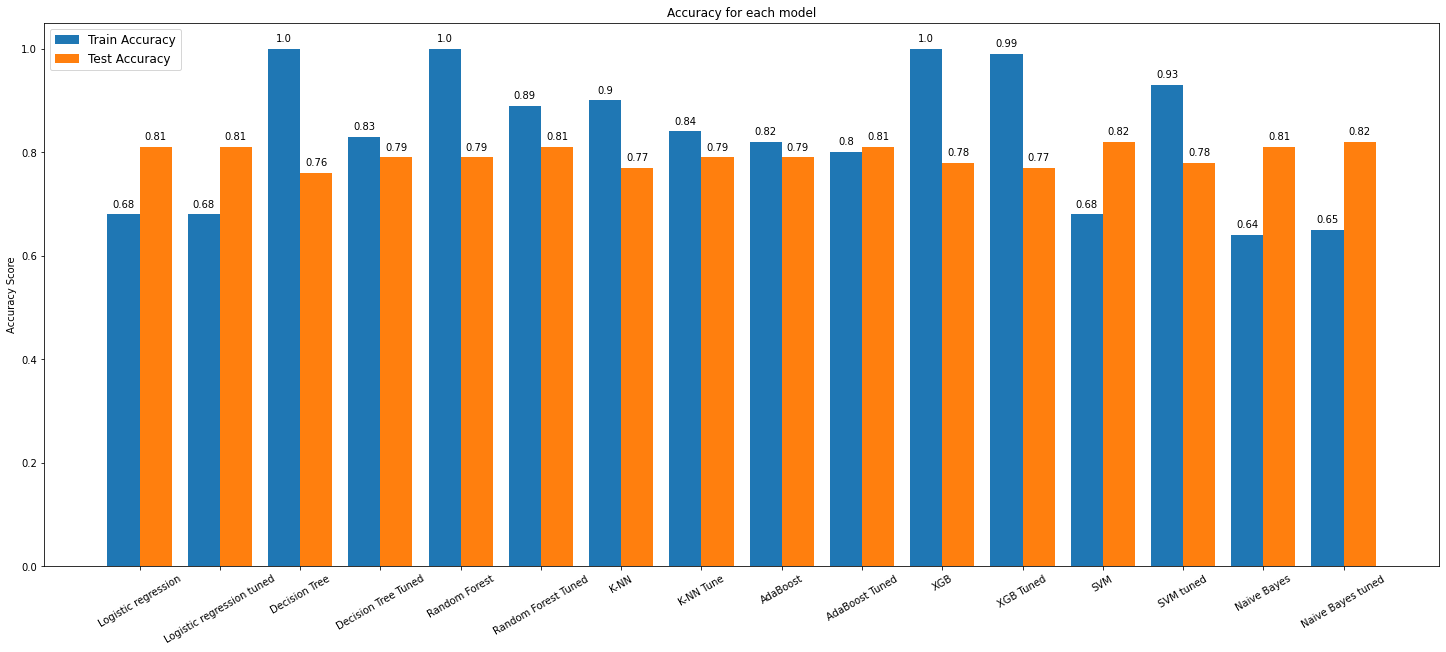

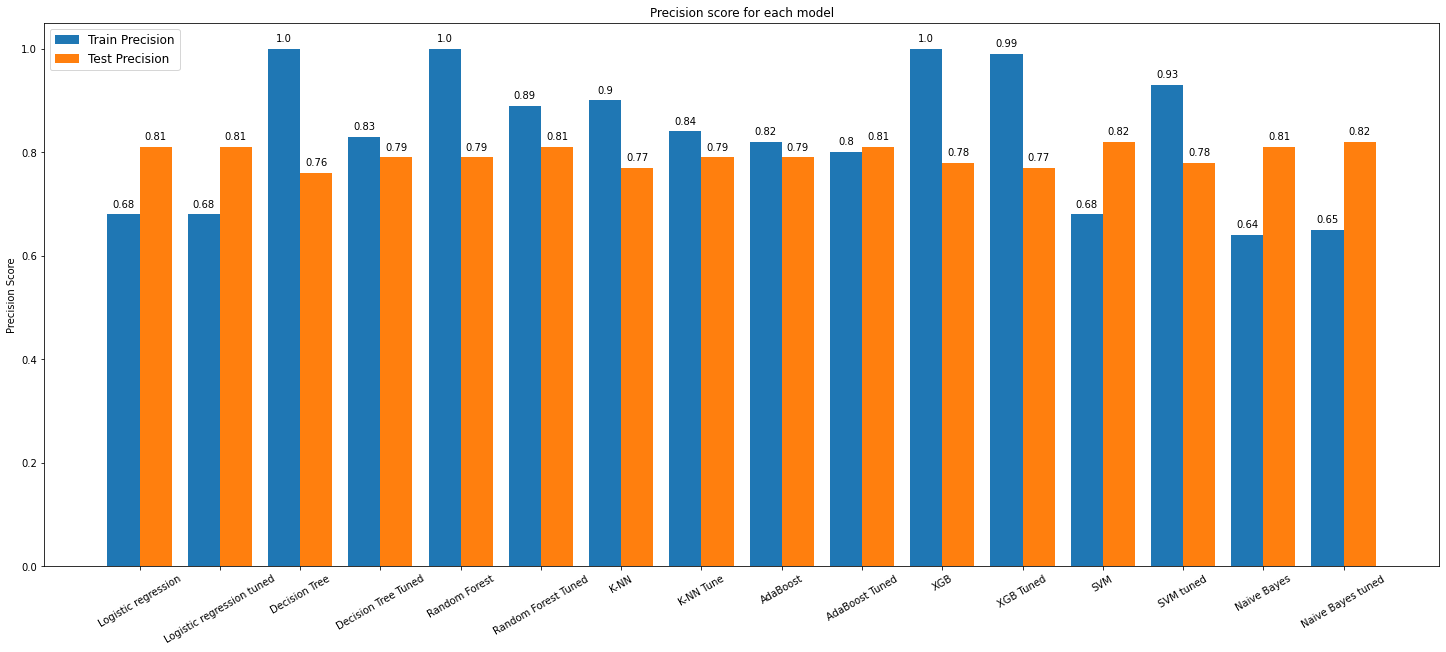

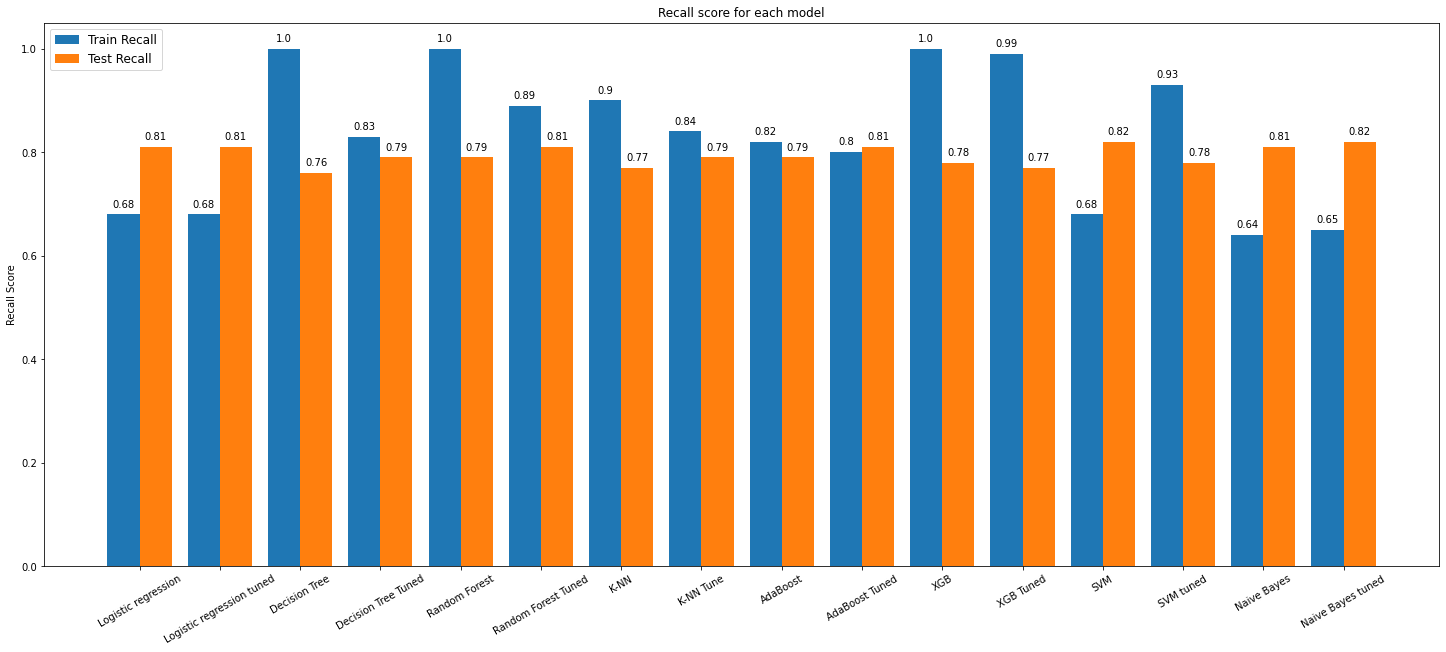

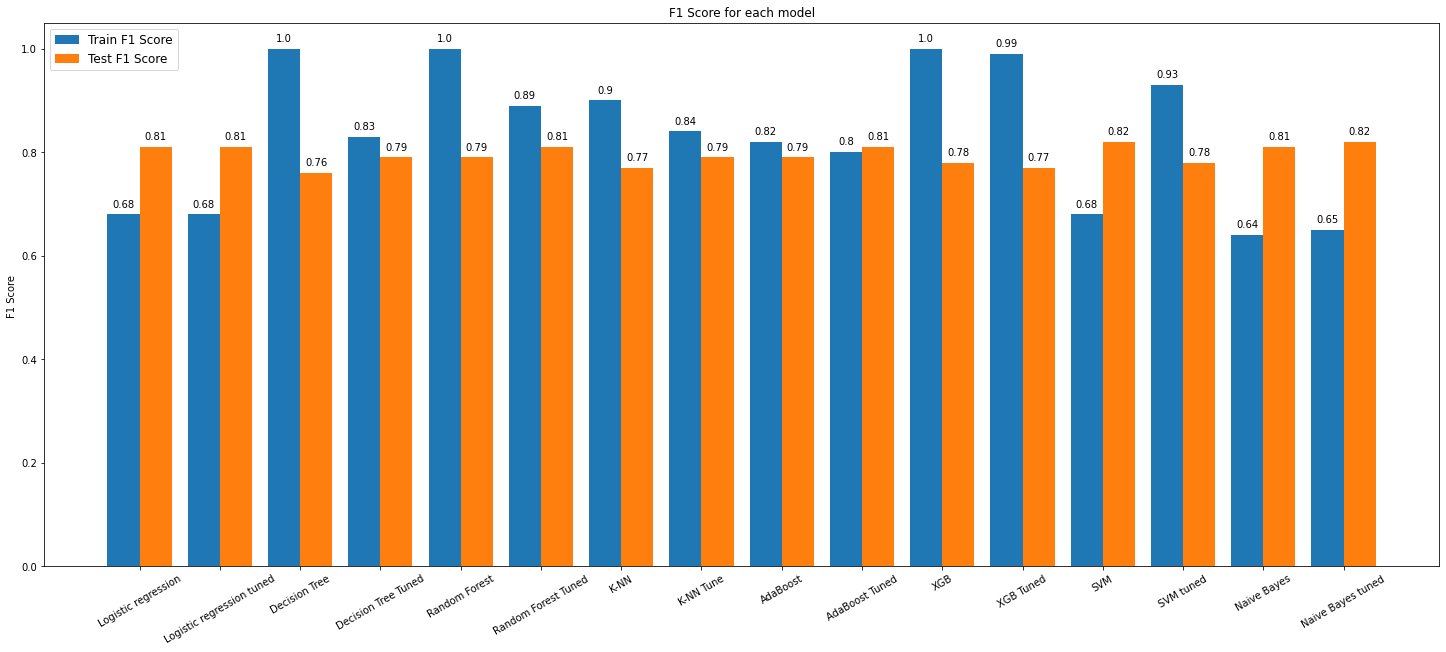

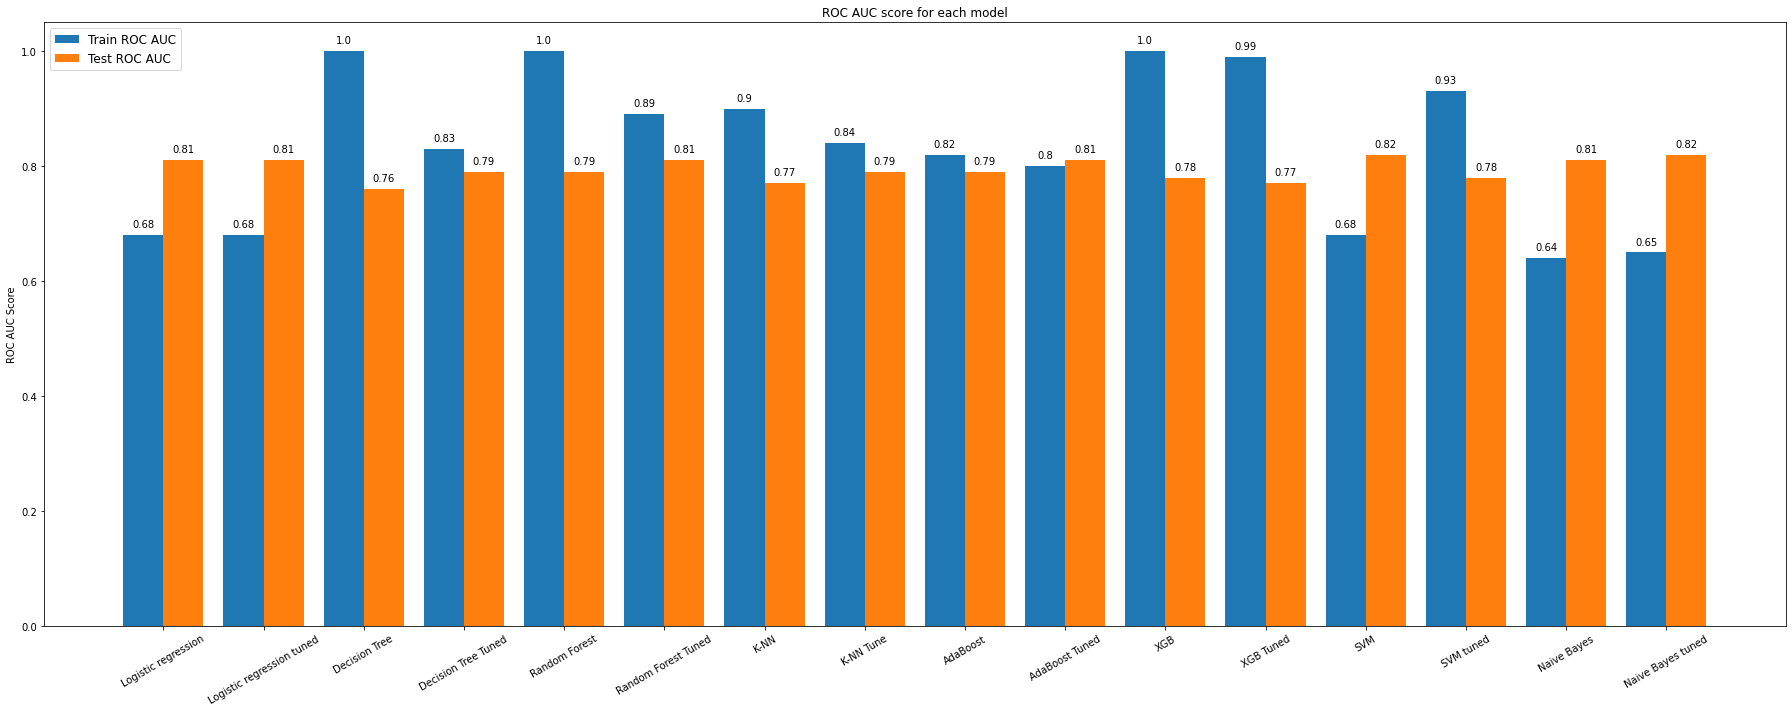

In [395]:
metrics_plots(score)

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***